**Importing the Libraries:**

In [382]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,log_loss,confusion_matrix,cohen_kappa_score
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
from scipy import stats
from scipy.stats import shapiro,levene,chi2_contingency,f_oneway
from sklearn.preprocessing import StandardScaler,PowerTransformer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

**Setting the size for all upcoming figures of the notebook:** 

In [383]:
plt.rcParams['figure.figsize']=[15,8]

**Loading the Dataset:**

In [384]:
df=pd.read_csv('Capstone Project Dataset.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Data Dictionary:**

The dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?. This column is Yes if the rain for that day was 1mm or more.

**Attribute Information:**

**Location:** The common name of the location of the weather station

**MinTemp:** The minimum temperature in degrees celsius

**MaxTemp:** The maximum temperature in degrees celsius

**Rainfall:** The amount of rainfall recorded for the day in mm

**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am

**Sunshine:** The number of hours of bright sunshine in the day

**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight

**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight

**WindDir9am:** Direction of the wind at 9am

**WindDir3pm:** Direction of the wind at 3pm

**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am

**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm

**Humidity9am:** Humidity (percent) at 9am

**Humidity3pm:** Humidity (percent) at 3pm

**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am

**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm

**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

**Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

**Temp9am:** Temperature (degrees C) at 9am

**Temp3pm:** Temperature (degrees C) at 3pm

**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

**RainTomorrow:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

**Data Types:**

In [385]:
df_data_types=pd.DataFrame(data=df.dtypes,columns=['Data Type'])
df_data_types

,Data Type
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


From the above ouput, it can be observed that the only feature whose data type is incorrect is Date which can be rectified as shown below:

In [386]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [387]:
df_data_types=pd.DataFrame(data=df.dtypes,columns=['Data Type'])
df_data_types

,Data Type
Date,datetime64[ns]
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


The above output shows the revised data types of all features which is correct.

**Feature Engineering:**

A new feature displaying just the month pertaining to each date can be created as shown below:  

In [388]:
df['Month']=df['Date'].dt.month

Now, the feature - Date can be dropped as shown below: 

In [389]:
df.drop(columns=['Date'],inplace=True)

Feature engineering can be done on the feature - Month to create a new feature - Season and also, the feature - Month can be dropped as shown below:

In [390]:
def season(x):
    if x>=1 and x<=2:
        x='Summer'
    elif x>=3 and x<=5:
        x='Autumn'
    elif x>=6 and x<=8:
        x='Winter'
    elif x>=9 and x<=11:
        x='Spring'
    else:
        x='Summer'
    return x

df['Season']=df['Month'].apply(season)
df.drop(columns=['Month'],inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Summer
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Summer
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Summer
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Summer
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Summer


In [391]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Season'],
      dtype='object')

In [392]:
df['Season'].unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [393]:
df_data_types=pd.DataFrame(data=df.dtypes,columns=['Data Type'])
df_data_types

,Data Type
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


Hence, the original feature - Date has been converted into a new feature - Season as seen in the above output.

**Data Information:**

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

**Shape of the Data:**

In [395]:
df.shape

(145460, 23)

The dataset has 145460 rows and 23 columns.

**Variable categorization:**

In [396]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print('The categorical features are:',cat)
print()
print('The numerical features are:',num)
print()
print('From the above output, it can be observed that there are',len(cat)-1,'categorical features and',len(num),'numerical features.')

The categorical features are: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Season']

The numerical features are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

From the above output, it can be observed that there are 6 categorical features and 16 numerical features.


The target variable has been removed from the list of categorical features as shown below:

In [397]:
cat.remove('RainTomorrow')
cat

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']

**Pre Processing Data Analysis:**

**Null Values in the Features:**

In [398]:
df_null_count=pd.DataFrame(data=df.isna().sum(),columns=['Count-Null Values'])
df_null_percent=pd.DataFrame(data=round(df.isna().sum()*100/len(df),2),columns=['%-Null Values'])
df_null=pd.concat(objs=[df_null_count,df_null_percent],axis=1)
df_null=df_null.sort_values(by=['%-Null Values'],ascending=False)
df_null

,Count-Null Values,%-Null Values
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


An entire feature is dropped only if the percentage of missing values in it is more than 60% to 70%.From the above, it can be observed that, for none of the features, the percentage of null values is greater than 50%. Hence none of the features need to be dropped for the current dataset. 

If the percentage of null values in a feature < 5%, then the observations containing the null values can be dropped as shown below: 

In [399]:
df.dropna(subset=['Humidity3pm','WindDir3pm','Temp3pm','RainTomorrow','Rainfall','RainToday','WindSpeed3pm','Humidity9am','Temp9am'
                  ,'WindSpeed9am','MinTemp','MaxTemp'],inplace=True)

**Skewness of the Features:**

In [400]:
df_skew=pd.DataFrame(data=round(df.skew(),2),columns=['Skewness'])
df_skew

,Skewness
MinTemp,0.03
MaxTemp,0.24
Rainfall,9.99
Evaporation,3.29
Sunshine,-0.51
WindGustSpeed,0.88
WindSpeed9am,0.75
WindSpeed3pm,0.69
Humidity9am,-0.48
Humidity3pm,0.04


**Distributions of the Features:**

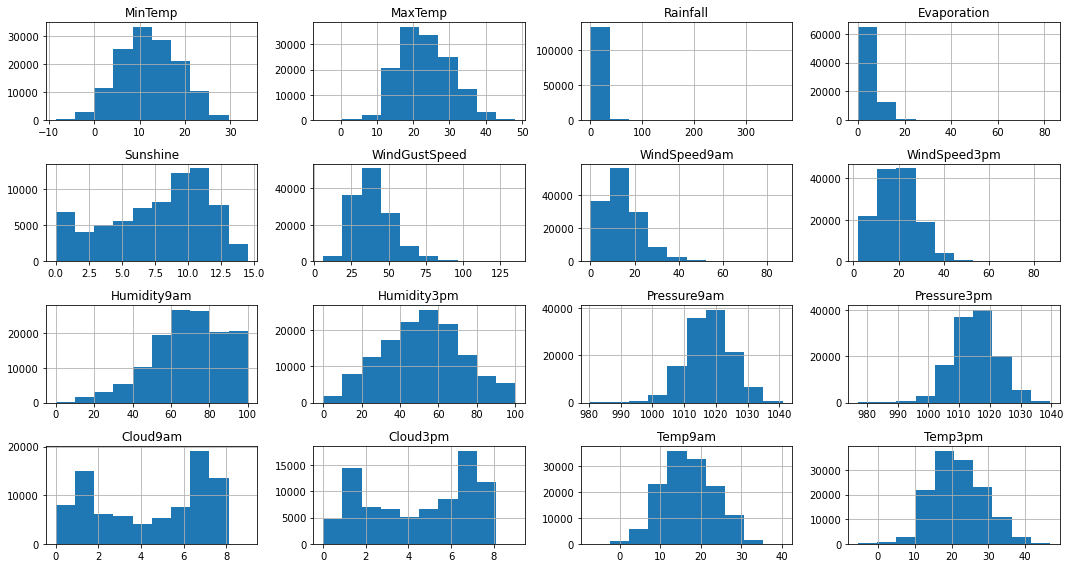

In [401]:
df.hist()
plt.tight_layout()
plt.show()

Null values in features having skewness within the range : +/- 0.5 have been imputed with mean considering the distributions of such features to be near normal while features with higher magnitudes of skewness have been imputed with median. The categorical features have been imputed with mode.

Following is the function used for null value imputation:

In [402]:
def null_value_imputation(num,cat):
    for i in num:
        if df[i].skew()<-0.5 or df[i].skew()>0.5:
            df[i]=df[i].fillna(df[i].median())
        else:
            df[i]=df[i].fillna(df[i].mean())
    for i in cat:
        df[i]=df[i].fillna(df[i].mode()[0])
        
null_value_imputation(num,cat)

**Null Values in the Revised DataFrame:**

In [403]:
df_null_count=pd.DataFrame(data=df.isna().sum(),columns=['Count-Null Values'])
df_null_percent=pd.DataFrame(data=round(df.isna().sum()*100/len(df),2),columns=['%-Null Values'])
df_null=pd.concat(objs=[df_null_count,df_null_percent],axis=1)
df_null=df_null.sort_values(by=['%-Null Values'],ascending=False)
df_null

,Count-Null Values,%-Null Values
Location,0,0.0
Humidity9am,0,0.0
RainTomorrow,0,0.0
RainToday,0,0.0
Temp3pm,0,0.0
Temp9am,0,0.0
Cloud3pm,0,0.0
Cloud9am,0,0.0
Pressure3pm,0,0.0
Pressure9am,0,0.0


The above output shows that the null values have been treated successfully.

**Basic Technique to detect Redundant Columns:**

In [404]:
df_std=pd.DataFrame(data=round(df.std(),2),columns=['Standard Deviation'])
df_std

,Standard Deviation
MinTemp,6.38
MaxTemp,7.06
Rainfall,8.38
Evaporation,3.18
Sunshine,2.81
WindGustSpeed,13.22
WindSpeed9am,8.83
WindSpeed3pm,8.69
Humidity9am,19.09
Humidity3pm,20.75


If the standard deviation of a feature is close to 0, it means that all values of that particular feature are almost the same or that they lie within an extremely small range. Hence it can be inferred that changes in the target variable are not caused by such features, thus making them redundant features.

From the above output, it can be observed that the standard deviation of all features is much higher than 0 and hence none of the features can be considered to be redundant.

**Exploratory Data Analysis:**

**Relationship between variables & Multi-Collinearity:**

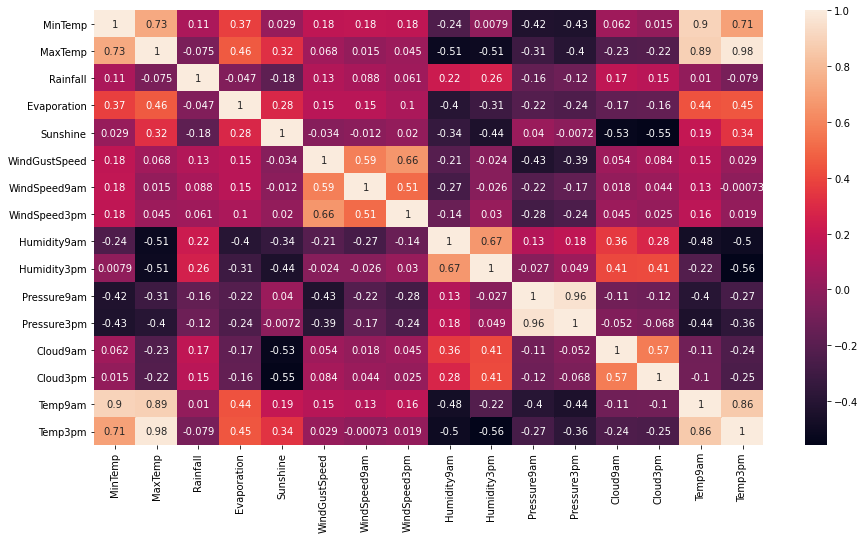

In [405]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [406]:
round(df.corr(),2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.73,0.11,0.37,0.03,0.18,0.18,0.18,-0.24,0.01,-0.42,-0.43,0.06,0.02,0.90,0.71
MaxTemp,0.73,1.00,-0.07,0.46,0.32,0.07,0.01,0.05,-0.51,-0.51,-0.31,-0.40,-0.23,-0.22,0.89,0.98
Rainfall,0.11,-0.07,1.00,-0.05,-0.18,0.13,0.09,0.06,0.22,0.26,-0.16,-0.12,0.17,0.15,0.01,-0.08
Evaporation,0.37,0.46,-0.05,1.00,0.28,0.15,0.15,0.10,-0.40,-0.31,-0.22,-0.24,-0.17,-0.16,0.44,0.45
Sunshine,0.03,0.32,-0.18,0.28,1.00,-0.03,-0.01,0.02,-0.34,-0.44,0.04,-0.01,-0.53,-0.55,0.19,0.34
WindGustSpeed,0.18,0.07,0.13,0.15,-0.03,1.00,0.59,0.66,-0.21,-0.02,-0.43,-0.39,0.05,0.08,0.15,0.03
WindSpeed9am,0.18,0.01,0.09,0.15,-0.01,0.59,1.00,0.51,-0.27,-0.03,-0.22,-0.17,0.02,0.04,0.13,-0.00
WindSpeed3pm,0.18,0.05,0.06,0.10,0.02,0.66,0.51,1.00,-0.14,0.03,-0.28,-0.24,0.05,0.02,0.16,0.02
Humidity9am,-0.24,-0.51,0.22,-0.40,-0.34,-0.21,-0.27,-0.14,1.00,0.67,0.13,0.18,0.36,0.28,-0.48,-0.50
Humidity3pm,0.01,-0.51,0.26,-0.31,-0.44,-0.02,-0.03,0.03,0.67,1.00,-0.03,0.05,0.41,0.41,-0.22,-0.56


From the above heatmap as well as correlation table, it can be observed that moderate to strong correlation exists among many of the pairs of numerical features.Hence it can be inferred that mutli-collinearity is present in the data.This can be further verified with the help of Variance Inflation Factor as seen below:

In [407]:
vif=pd.DataFrame()
num_predictors=df.select_dtypes(include=np.number)
vif['Features']=num_predictors.columns
vif['VIF']=np.round([variance_inflation_factor(num_predictors.values,i) for i in range(num_predictors.shape[1])],2)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
10,Pressure9am,392829.10
11,Pressure3pm,390820.42
15,Temp3pm,567.13
1,MaxTemp,522.26
14,Temp9am,172.66
8,Humidity9am,56.80
9,Humidity3pm,44.50
0,MinTemp,42.55
5,WindGustSpeed,22.84
4,Sunshine,16.49


Since the VIF of almost all features is greater than 5, it can be inferred that a high amount of correlation is present among the numerical predictors of the dataset, thus indicating that strong multi-collinearity is present in the data. 

**Distribution of Variables:**

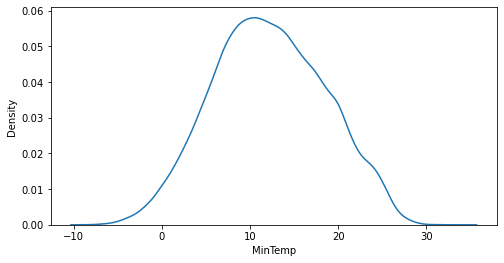

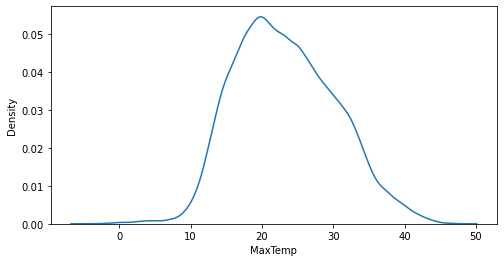

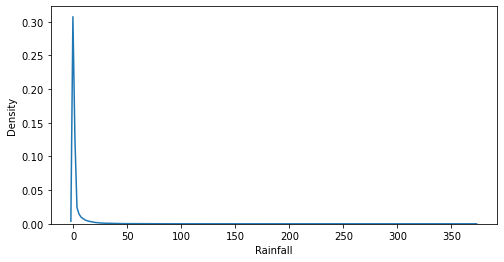

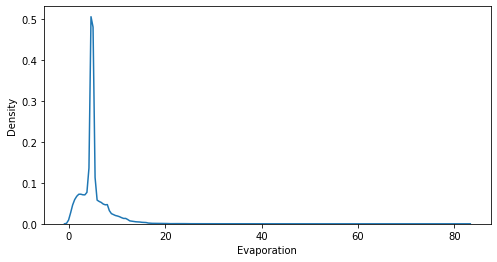

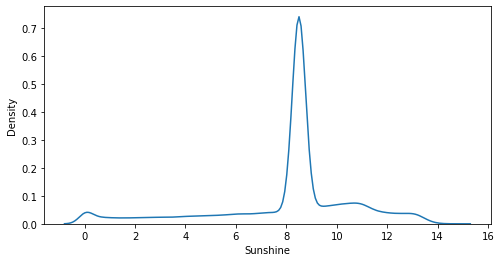

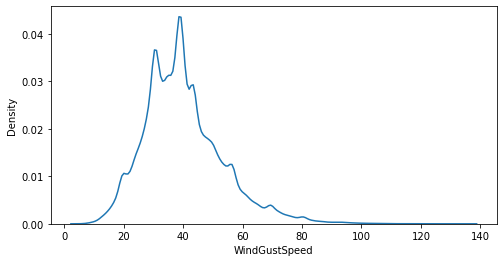

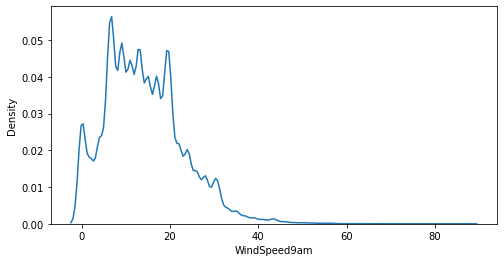

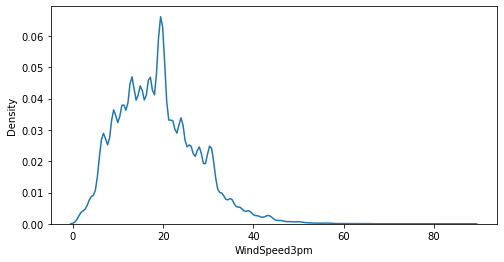

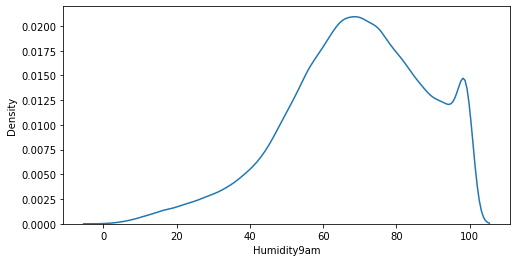

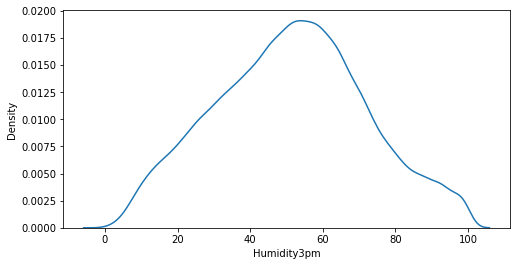

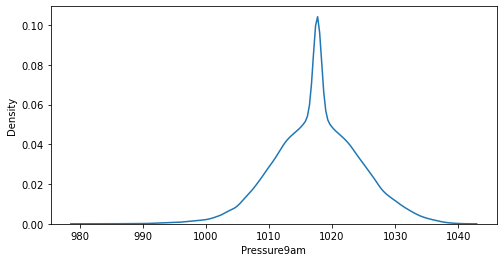

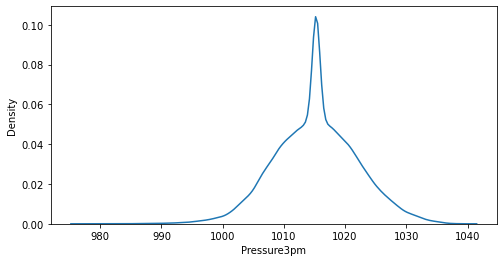

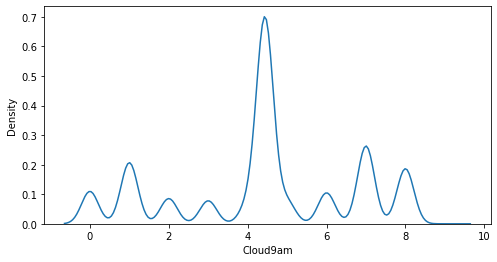

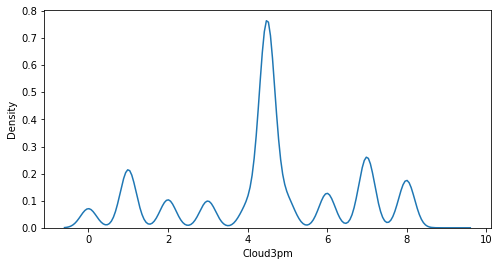

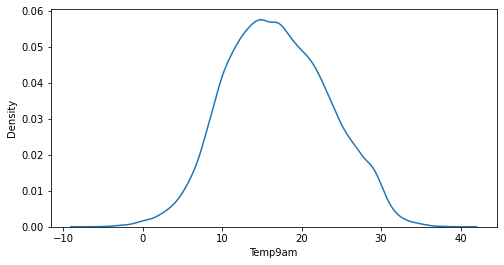

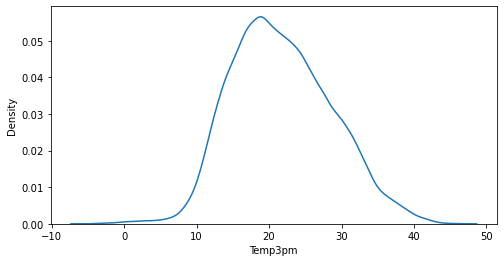

In [408]:
for i in df.columns:
    if df[i].dtype!='object':
        plt.figure(figsize=(8,4))
        sns.kdeplot(df[i])
        plt.show()

**Revised Skewness of the Features:**

In [409]:
df_skew=pd.DataFrame(data=round(df.skew(),2),columns=['Skewness'])
df_skew.sort_values(by=['Skewness'])

,Skewness
Sunshine,-1.08
Humidity9am,-0.48
Cloud9am,-0.28
Cloud3pm,-0.28
Pressure9am,-0.11
Pressure3pm,-0.06
MinTemp,0.03
Humidity3pm,0.04
Temp9am,0.10
MaxTemp,0.24


From the above metrics of skewness as well as the kde plots, the following can be inferred:

-The distributions of the features - `MinTemp`,`MaxTemp`,`Sunshine`,`Humidity3pm`,`Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`,`Temp3pm` are near normal distributions.

-The distributions of the features - `Rainfall`,`Evaporation`,`WindGustSpeed `,`WindSpeed9am`,`WindSpeed3pm ` are right-skewed distributions.

-The distribution of the feature -`Humidity9am` is a left-skewed distribution.

It can be observed that the distributions of most of the numerical predictors are near normal.This is also in line with the fact that moderate to strong correlation exists among many pairs of numerical predictors as seen above.Hence, it can be inferred that the dataset has linear relationship patterns in them. 

**Detection & Treatment of Outliers:**

**Data Shape before removing the Outliers:**

In [410]:
df.shape

(134590, 23)

It can be observed that the dataframe has 134590 rows and 22 columns prior to outlier treatment.

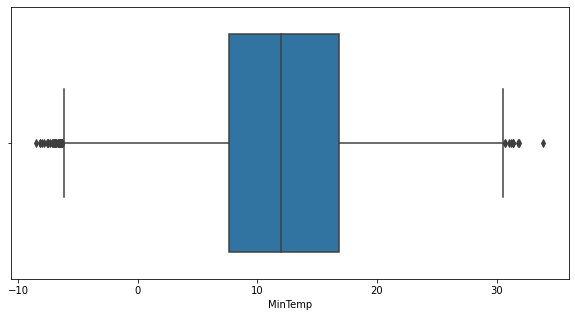

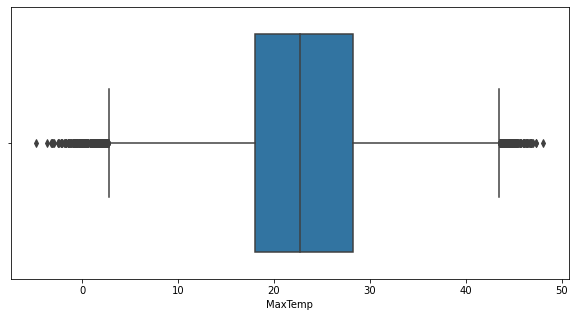

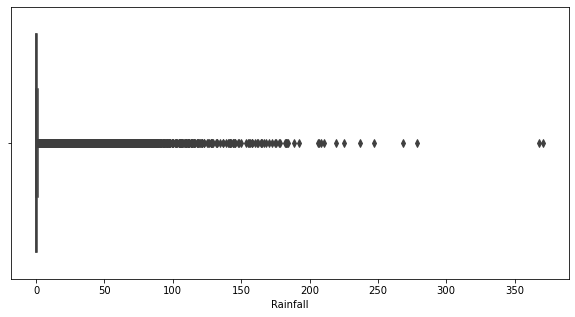

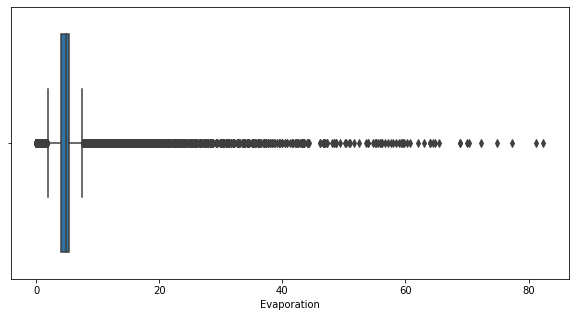

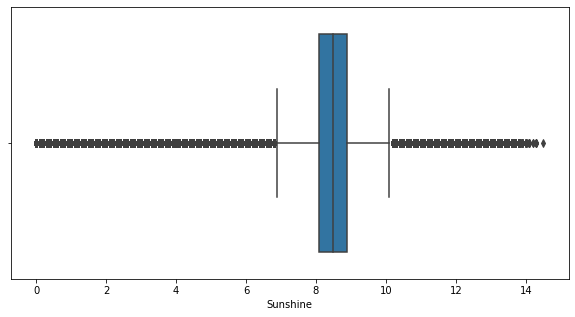

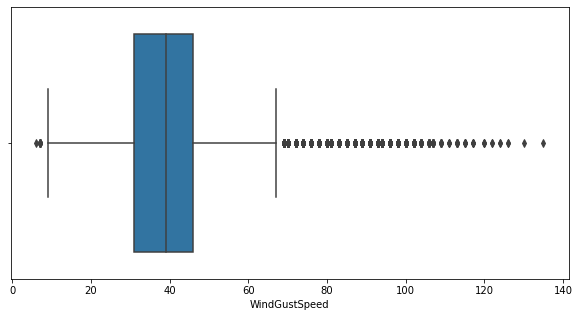

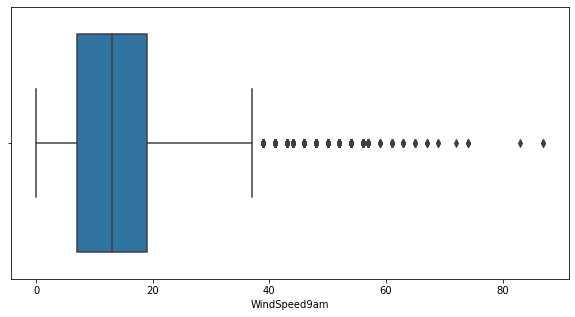

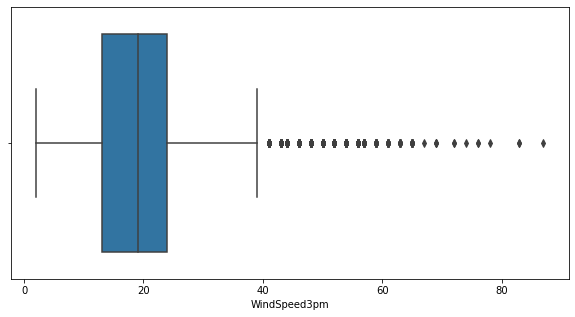

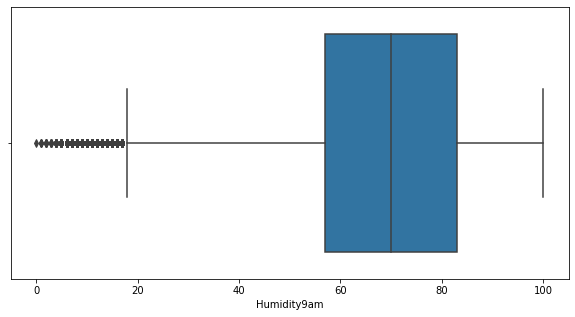

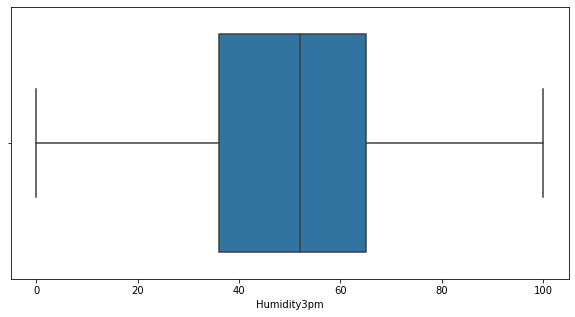

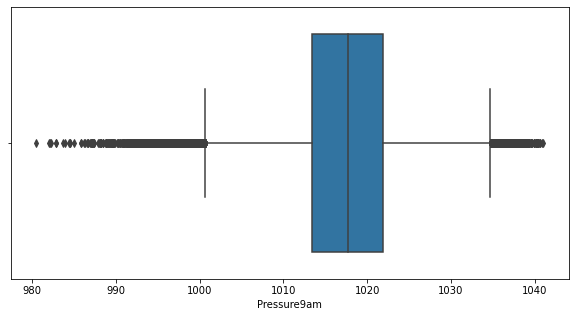

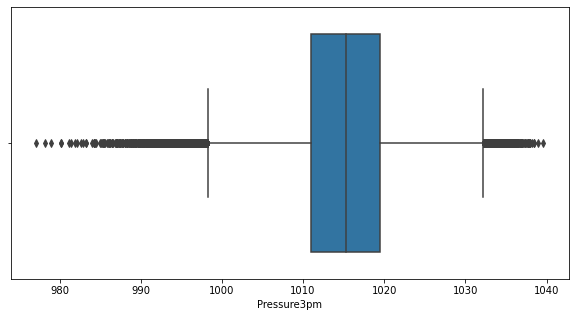

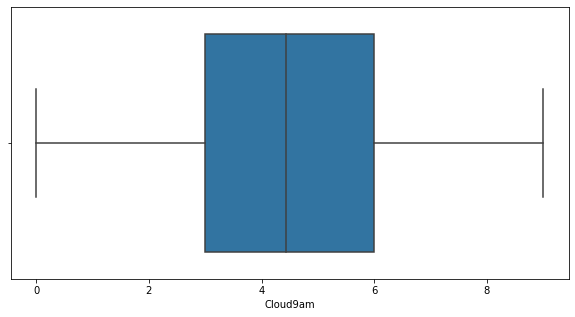

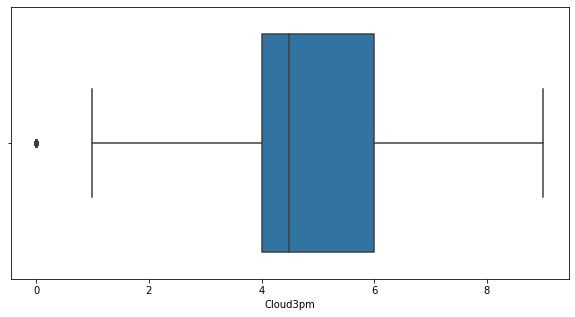

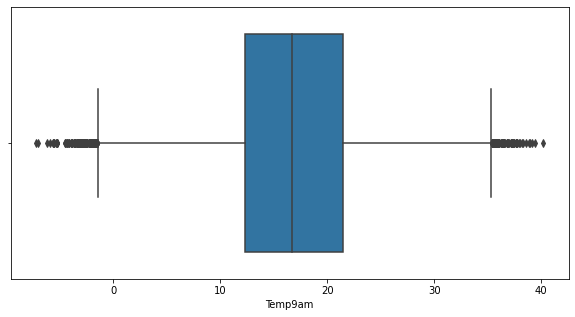

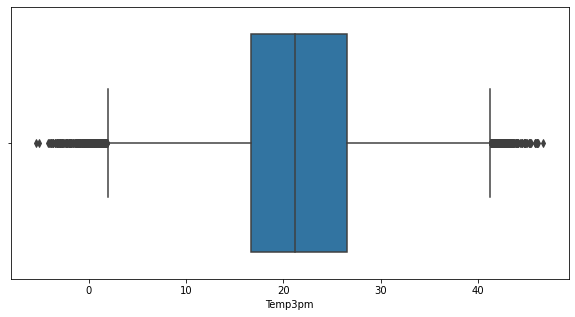

In [411]:
for i in num:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()

From the above boxplots, it can be observed that there are outliers in the features that need to removed as shown below:

In [412]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ll=q1-3*iqr
ul=q3+3*iqr
df=df[~((df<ll)|(df>ul)).any(axis=1)]
df=df.reset_index(drop=True)
df.shape

(82184, 23)

Since even the outliers contain some vital information, only the extreme outliers lying beyond the outer fence of the boxplots have been removed as shown above.Hence it can be observed that the revised dataset after outlier treatment has 82184 rows and 22 columns.

**Statistical Significance of Variables/Feature Selection:**

In [106]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.000000,4.49369,16.9,21.8,No,No,Summer
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,4.437723,4.49369,17.2,24.3,No,No,Summer
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,4.437723,2.00000,21.0,23.2,No,No,Summer
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,16.0,1017.6,1012.8,4.437723,4.49369,18.1,26.5,No,No,Summer
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,Summer


In [107]:
print(num)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [108]:
print(cat)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']


To test the statistical significance of all variables,the level of significance has been assumed to be 5% as shown below:

In [109]:
alpha=0.05

**Numerical Features:**

**MinTemp:**

In [260]:
print('H0:The minimum temperature on rainy day as well as non-rainy day is the same')
print('H1:The minimum temperature on rainy day as well as non-rainy day is not the same')
min_temp_rainy_day=df[df['RainTomorrow']=='Yes']['MinTemp']
min_temp_non_rainy_day=df[df['RainTomorrow']=='No']['MinTemp']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(min_temp_rainy_day))
print(shapiro(min_temp_non_rainy_day))
print('Although pvalue < alpha,it can be inferred that the sample data is normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(min_temp_rainy_day,min_temp_non_rainy_day))
print('Since pvalue > alpha, it can be inferred that the populations have equal variance')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(min_temp_rainy_day,min_temp_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The minimum temperature on rainy day as well as non-rainy day is the same')
else:
    print('H1:The minimum temperature on rainy day as well as non-rainy day is not the same')

H0:The minimum temperature on rainy day as well as non-rainy day is the same
H1:The minimum temperature on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9932846426963806, pvalue=3.922978775937676e-23)
ShapiroResult(statistic=0.9952176213264465, pvalue=4.232047479122737e-40)
Although pvalue < alpha,it can be inferred that the sample data is normally distributed as evident from the below distribution plots.
LeveneResult(statistic=2.0029928833369435, pvalue=0.1569927524795212)
Since pvalue > alpha, it can be inferred that the populations have equal variance
Conclusion of the test is:
H1:The minimum temperature on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `MinTemp` is statistically significant in predicting the target variable.

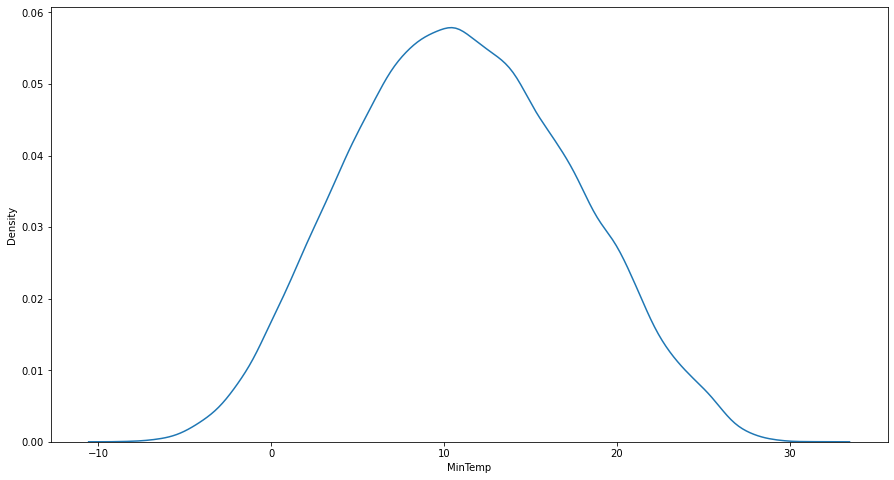

In [261]:
sns.kdeplot(min_temp_non_rainy_day)
plt.show()

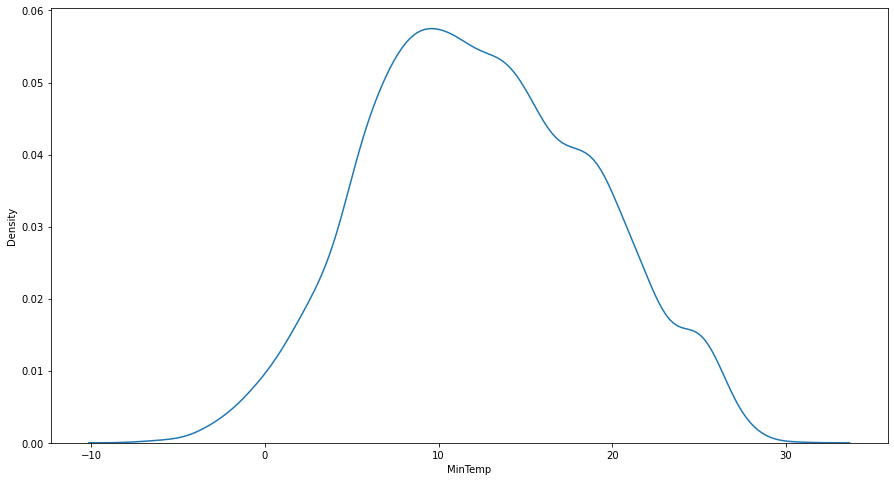

In [262]:
sns.kdeplot(min_temp_rainy_day)
plt.show()

**MaxTemp:**

In [263]:
print('H0:The maximum temperature on rainy day as well as non-rainy day is the same')
print('H1:The maximum temperature on rainy day as well as non-rainy day is not the same')
max_temp_rainy_day=df[df['RainTomorrow']=='Yes']['MaxTemp']
max_temp_non_rainy_day=df[df['RainTomorrow']=='No']['MaxTemp']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(max_temp_rainy_day))
print(shapiro(max_temp_non_rainy_day))
print('Although pvalue < alpha,it can be inferred that the sample data is normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(max_temp_rainy_day,max_temp_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(max_temp_rainy_day,max_temp_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The maximum temperature on rainy day as well as non-rainy day is the same')
else:
    print('H1:The maximum temperature on rainy day as well as non-rainy day is not the same')

H0:The maximum temperature on rainy day as well as non-rainy day is the same
H1:The maximum temperature on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9926024675369263, pvalue=2.859408972273116e-24)
ShapiroResult(statistic=0.9951048493385315, pvalue=1.782269477820805e-40)
Although pvalue < alpha,it can be inferred that the sample data is normally distributed as evident from the below distribution plots.
LeveneResult(statistic=50.69987557113547, pvalue=1.0850408367802265e-12)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The maximum temperature on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `MaxTemp` is statistically significant in predicting the target variable.

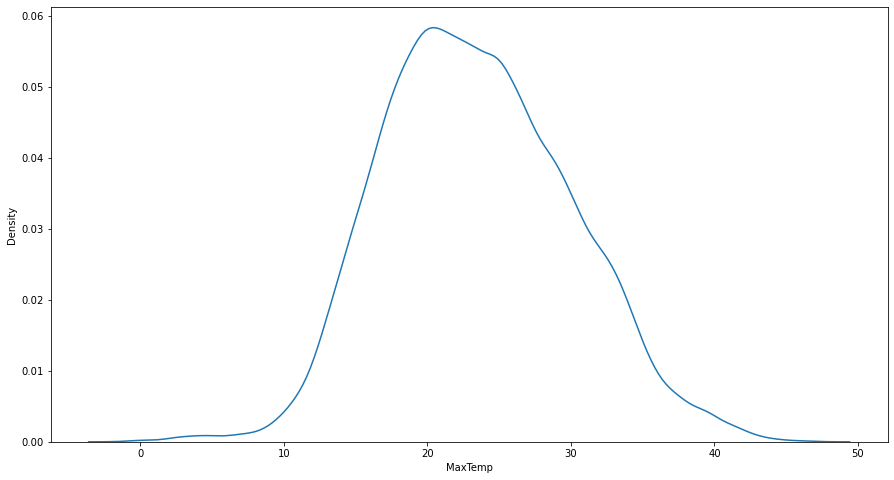

In [264]:
sns.kdeplot(max_temp_non_rainy_day)
plt.show()

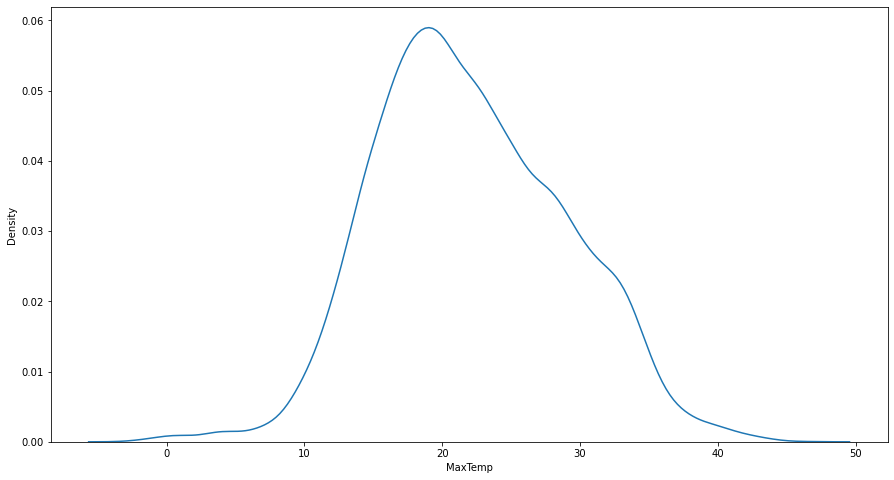

In [265]:
sns.kdeplot(max_temp_rainy_day)
plt.show()

**Rainfall:**

In [266]:
print('H0:The average amount of rainfall on rainy day as well as non-rainy day is the same')
print('H1:The average amount of rainfall on rainy day as well as non-rainy day is not the same')
rainfall_rainy_day=df[df['RainTomorrow']=='Yes']['Rainfall']
rainfall_non_rainy_day=df[df['RainTomorrow']=='No']['Rainfall']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(rainfall_rainy_day))
print(shapiro(rainfall_non_rainy_day))
print('Although pvalue < alpha,we assume that the sample data is normally distributed.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(rainfall_rainy_day,rainfall_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(rainfall_rainy_day,rainfall_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average amount of rainfall on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average amount of rainfall on rainy day as well as non-rainy day is not the same')

H0:The average amount of rainfall on rainy day as well as non-rainy day is the same
H1:The average amount of rainfall on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.6275904178619385, pvalue=0.0)
ShapiroResult(statistic=0.41822826862335205, pvalue=0.0)
Although pvalue < alpha,we assume that the sample data is normally distributed.
LeveneResult(statistic=1885.108444064424, pvalue=0.0)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average amount of rainfall on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Rainfall` is statistically significant in predicting the target variable.

**Evaporation:**

In [267]:
print('H0:The average amount of evaporation on rainy day as well as non-rainy day is the same')
print('H1:The average amount of evaporation on rainy day as well as non-rainy day is not the same')
evaporation_rainy_day=df[df['RainTomorrow']=='Yes']['Evaporation']
evaporation_non_rainy_day=df[df['RainTomorrow']=='No']['Evaporation']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(evaporation_rainy_day))
print(shapiro(evaporation_non_rainy_day))
print('Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(evaporation_rainy_day,evaporation_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(evaporation_rainy_day,evaporation_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average amount of evaporation on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average amount of evaporation on rainy day as well as non-rainy day is not the same')

H0:The average amount of evaporation on rainy day as well as non-rainy day is the same
H1:The average amount of evaporation on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.7983567118644714, pvalue=0.0)
ShapiroResult(statistic=0.8587037920951843, pvalue=0.0)
Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=112.60791242971611, pvalue=2.7347463409341624e-26)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average amount of evaporation on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Evaporation` is statistically significant in predicting the target variable.

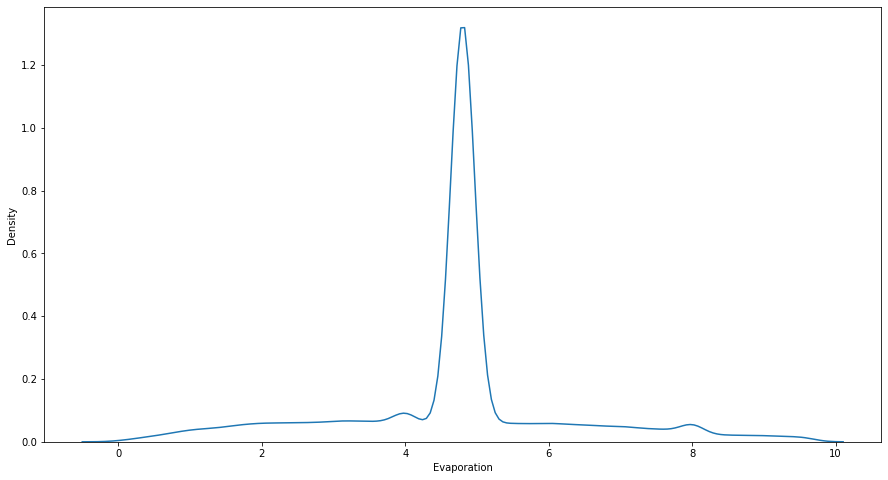

In [268]:
sns.kdeplot(evaporation_non_rainy_day)
plt.show()

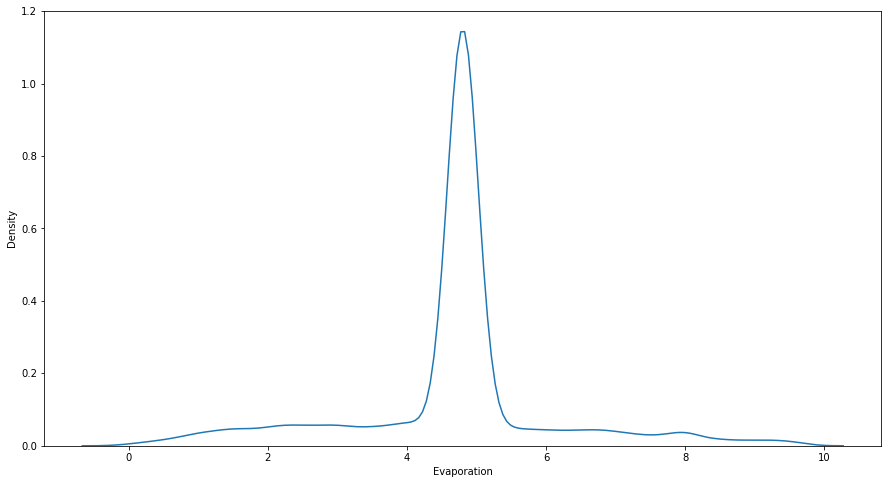

In [269]:
sns.kdeplot(evaporation_rainy_day)
plt.show()

**Sunshine:**

In [270]:
print('H0:The average amount of sunshine on rainy day as well as non-rainy day is the same')
print('H1:The average amount of sunshine on rainy day as well as non-rainy day is not the same')
sunshine_rainy_day=df[df['RainTomorrow']=='Yes']['Sunshine']
sunshine_non_rainy_day=df[df['RainTomorrow']=='No']['Sunshine']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(sunshine_rainy_day))
print(shapiro(sunshine_non_rainy_day))
print('Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(sunshine_rainy_day,sunshine_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(sunshine_rainy_day,sunshine_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average amount of sunshine on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average amount of sunshine on rainy day as well as non-rainy day is not the same')

H0:The average amount of sunshine on rainy day as well as non-rainy day is the same
H1:The average amount of sunshine on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.72336745262146, pvalue=0.0)
ShapiroResult(statistic=0.811668336391449, pvalue=0.0)
Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=374.981952130419, pvalue=2.3641717431109937e-83)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average amount of sunshine on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Sunshine` is statistically significant in predicting the target variable.

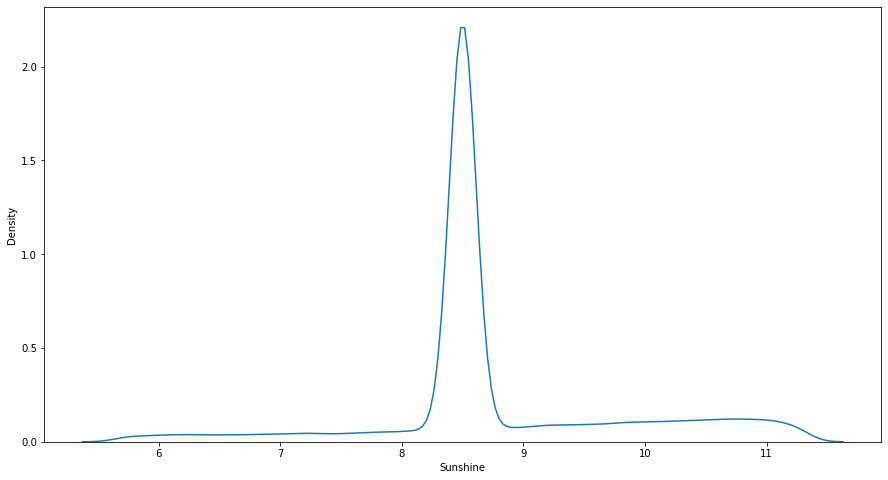

In [271]:
sns.kdeplot(sunshine_non_rainy_day)
plt.show()

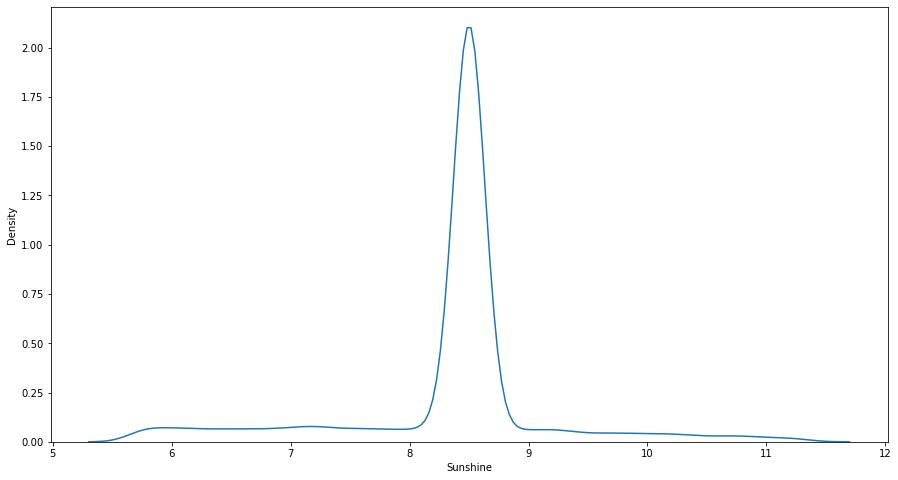

In [272]:
sns.kdeplot(sunshine_rainy_day)
plt.show()

**WindGustSpeed:**

In [273]:
print('H0:The average windgustspeed on rainy day as well as non-rainy day is the same')
print('H1:The average windgustspeed on rainy day as well as non-rainy day is not the same')
windgustspeed_rainy_day=df[df['RainTomorrow']=='Yes']['WindGustSpeed']
windgustspeed_non_rainy_day=df[df['RainTomorrow']=='No']['WindGustSpeed']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(windgustspeed_rainy_day))
print(shapiro(windgustspeed_non_rainy_day))
print('Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(windgustspeed_rainy_day,windgustspeed_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(windgustspeed_rainy_day,windgustspeed_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average windgustspeed on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average windgustspeed on rainy day as well as non-rainy day is not the same')

H0:The average windgustspeed on rainy day as well as non-rainy day is the same
H1:The average windgustspeed on rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9781255722045898, pvalue=5.214755671378302e-39)
ShapiroResult(statistic=0.9697731733322144, pvalue=0.0)
Although pvalue < alpha,the sample data can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=889.7403522101455, pvalue=1.831764587028692e-194)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average windgustspeed on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `WindGustSpeed` is statistically significant in predicting the target variable.

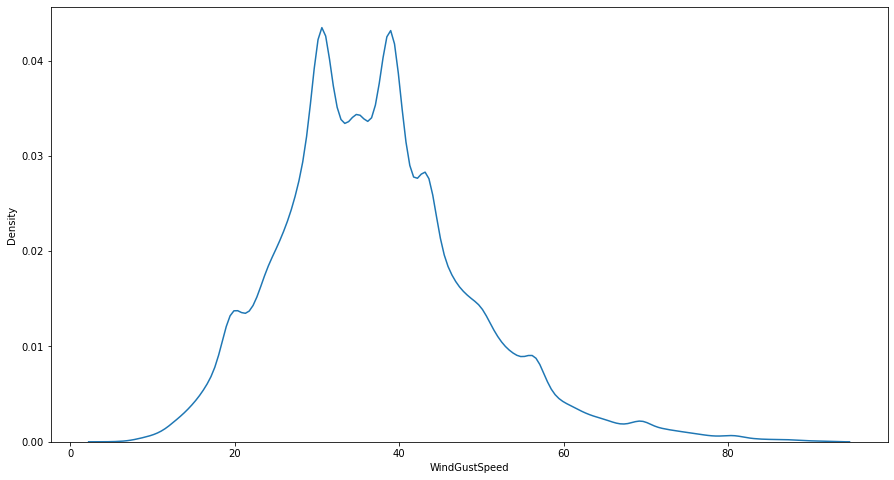

In [274]:
sns.kdeplot(windgustspeed_non_rainy_day)
plt.show()

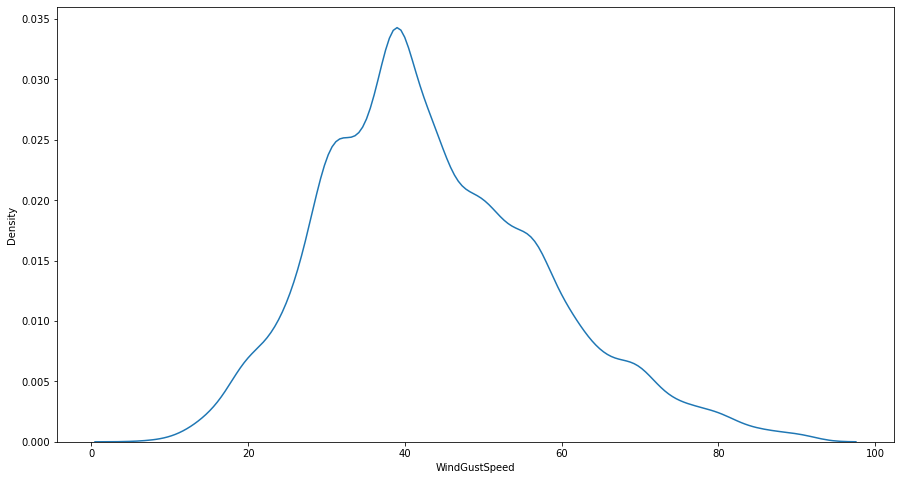

In [275]:
sns.kdeplot(windgustspeed_rainy_day)
plt.show()

**WindSpeed9am:**

In [276]:
print('H0:The average windspeed at 9am on rainy day as well as non-rainy day is the same')
print('H1:The average windspeed at 9am rainy day as well as non-rainy day is not the same')
windspeed9am_rainy_day=df[df['RainTomorrow']=='Yes']['WindSpeed9am']
windspeed9am_non_rainy_day=df[df['RainTomorrow']=='No']['WindSpeed9am']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(windspeed9am_rainy_day))
print(shapiro(windspeed9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the sample data is normally distributed.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(windspeed9am_rainy_day,windspeed9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(windspeed9am_rainy_day,windspeed9am_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average windspeed at 9am on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average windspeed at 9am on rainy day as well as non-rainy day is not the same')

H0:The average windspeed at 9am on rainy day as well as non-rainy day is the same
H1:The average windspeed at 9am rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9628809690475464, pvalue=0.0)
ShapiroResult(statistic=0.9625992774963379, pvalue=0.0)
Although pvalue < alpha,we assume that the sample data is normally distributed.
LeveneResult(statistic=94.92446729480655, pvalue=2.033990438490667e-22)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average windspeed at 9am on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `WindSpeed9am` is statistically significant in predicting the target variable.

**WindSpeed3pm:**

In [277]:
print('H0:The average windspeed at 3pm on rainy day as well as non-rainy day is the same')
print('H1:The average windspeed at 3pm rainy day as well as non-rainy day is not the same')
windspeed3pm_rainy_day=df[df['RainTomorrow']=='Yes']['WindSpeed3pm']
windspeed3pm_non_rainy_day=df[df['RainTomorrow']=='No']['WindSpeed3pm']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(windspeed3pm_rainy_day))
print(shapiro(windspeed3pm_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to follow normal distribution as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(windspeed3pm_rainy_day,windspeed3pm_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(windspeed3pm_rainy_day,windspeed3pm_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average windspeed at 3pm on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average windspeed at 3pm on rainy day as well as non-rainy day is not the same')

H0:The average windspeed at 3pm on rainy day as well as non-rainy day is the same
H1:The average windspeed at 3pm rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9724214673042297, pvalue=1.2345439470701638e-42)
ShapiroResult(statistic=0.9708409905433655, pvalue=0.0)
Although pvalue < alpha,samples can be considered to follow normal distribution as evident from the below distribution plots.
LeveneResult(statistic=204.98888154399148, pvalue=1.937196812059212e-46)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average windspeed at 3pm on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `WindSpeed3pm` is statistically significant in predicting the target variable.

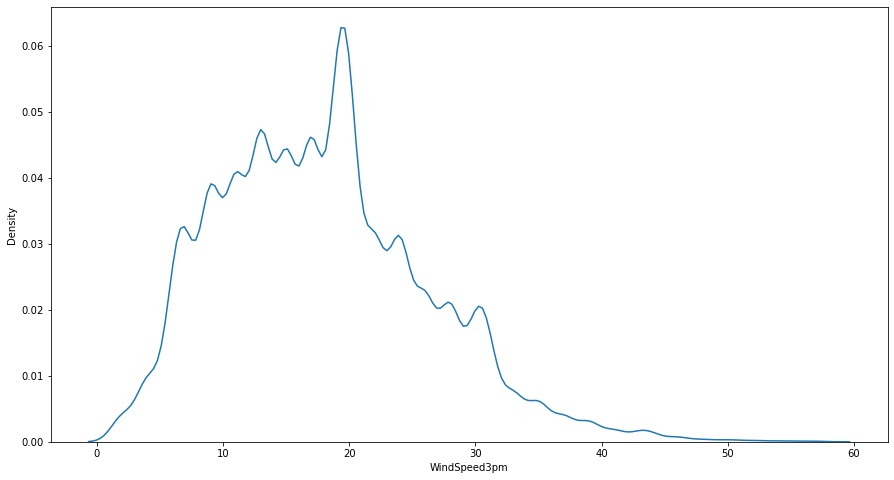

In [278]:
sns.kdeplot(windspeed3pm_non_rainy_day)
plt.show()

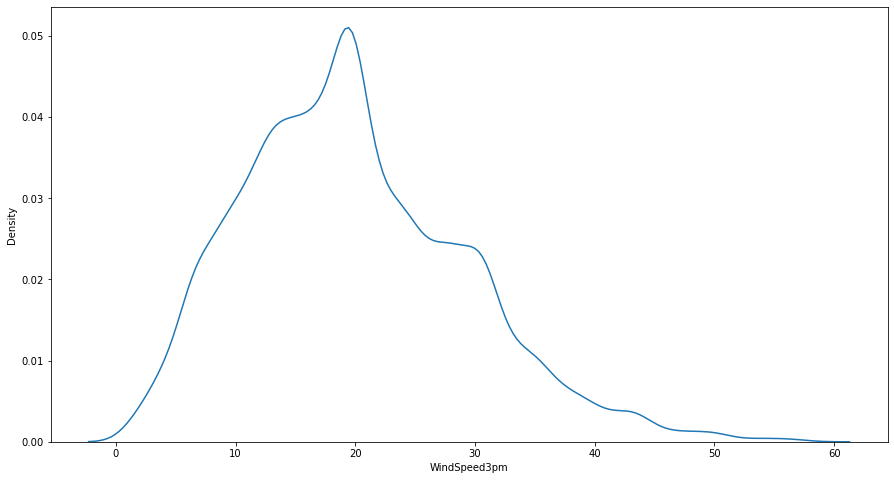

In [279]:
sns.kdeplot(windspeed3pm_rainy_day)
plt.show()

**Humidity9am:**

In [280]:
print('H0:The average humidity at 9am on rainy day as well as non-rainy day is the same')
print('H1:The average humidity at 9am rainy day as well as non-rainy day is not the same')
humidity9am_rainy_day=df[df['RainTomorrow']=='Yes']['Humidity9am']
humidity9am_non_rainy_day=df[df['RainTomorrow']=='No']['Humidity9am']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(humidity9am_rainy_day))
print(shapiro(humidity9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the samples are normally distributed.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(humidity9am_rainy_day,humidity9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(humidity9am_rainy_day,humidity9am_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average humidity at 9am on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average humidity at 9am on rainy day as well as non-rainy day is not the same')

H0:The average humidity at 9am on rainy day as well as non-rainy day is the same
H1:The average humidity at 9am rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9755005240440369, pvalue=9.220263635564431e-41)
ShapiroResult(statistic=0.987496554851532, pvalue=0.0)
Although pvalue < alpha,we assume that the samples are normally distributed.
LeveneResult(statistic=103.43695151475285, pvalue=2.7787344410029245e-24)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average humidity at 9am on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Humidity9am` is statistically significant in predicting the target variable.

**Humidity3pm:**

In [281]:
print('H0:The average humidity at 3pm on rainy day as well as non-rainy day is the same')
print('H1:The average humidity at 3pm rainy day as well as non-rainy day is not the same')
humidity3pm_rainy_day=df[df['RainTomorrow']=='Yes']['Humidity3pm']
humidity3pm_non_rainy_day=df[df['RainTomorrow']=='No']['Humidity3pm']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(humidity3pm_rainy_day))
print(shapiro(humidity3pm_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(humidity3pm_rainy_day,humidity3pm_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(humidity3pm_rainy_day,humidity3pm_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average humidity at 3pm on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average humidity at 3pm on rainy day as well as non-rainy day is not the same')

H0:The average humidity at 3pm on rainy day as well as non-rainy day is the same
H1:The average humidity at 3pm rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9875825643539429, pvalue=7.447674068250573e-31)
ShapiroResult(statistic=0.9958655834197998, pvalue=8.556159706832228e-38)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=329.1569580085684, pvalue=2.041864689555133e-73)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average humidity at 3pm on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Humidity3pm` is statistically significant in predicting the target variable.

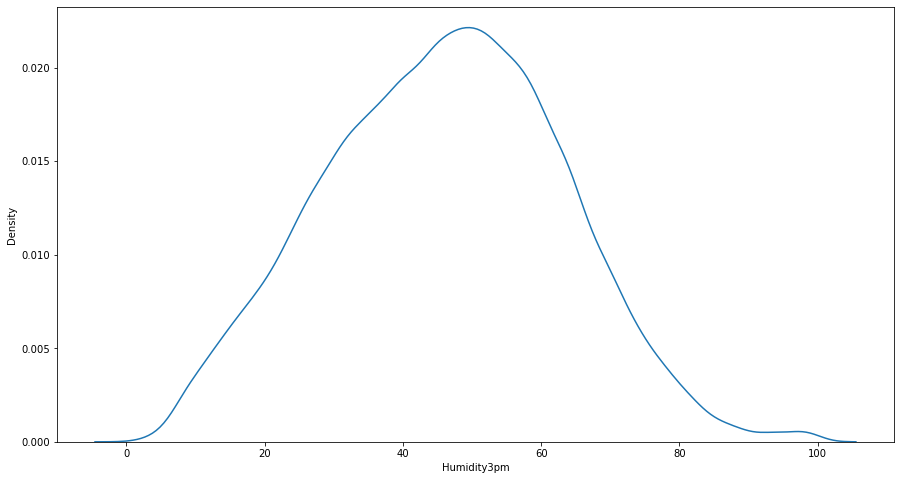

In [282]:
sns.kdeplot(humidity3pm_non_rainy_day)
plt.show()

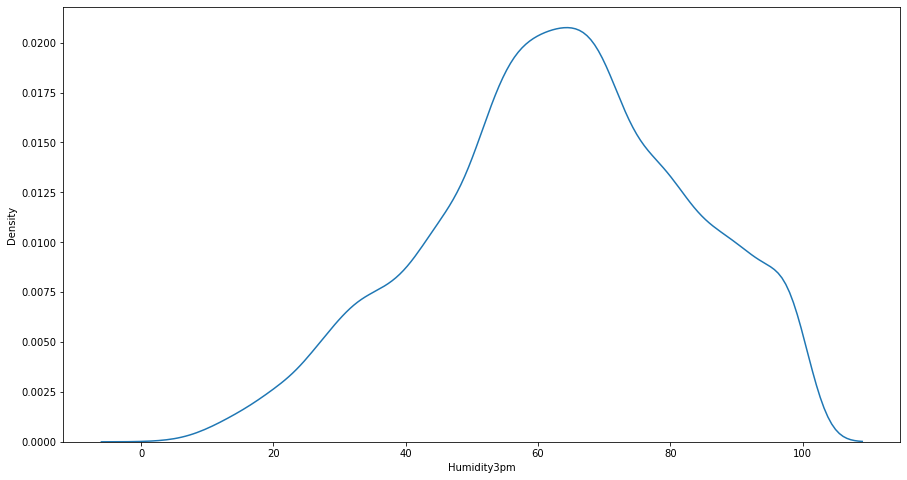

In [283]:
sns.kdeplot(humidity3pm_rainy_day)
plt.show()

**Pressure9am:**

In [284]:
print('H0:The average pressure at 9am on rainy day as well as non-rainy day is the same')
print('H1:The average pressure at 9am rainy day as well as non-rainy day is not the same')
pressure9am_rainy_day=df[df['RainTomorrow']=='Yes']['Pressure9am']
pressure9am_non_rainy_day=df[df['RainTomorrow']=='No']['Pressure9am']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(pressure9am_rainy_day))
print(shapiro(pressure9am_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(pressure9am_rainy_day,pressure9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(pressure9am_rainy_day,pressure9am_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average pressure at 9am on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average pressure at 9am on rainy day as well as non-rainy day is not the same')

H0:The average pressure at 9am on rainy day as well as non-rainy day is the same
H1:The average pressure at 9am rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.991034209728241, pvalue=1.2872985081762282e-26)
ShapiroResult(statistic=0.9922404885292053, pvalue=0.0)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=5.489946964758155, pvalue=0.01912849464157304)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average pressure at 9am on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Pressure9am` is statistically significant in predicting the target variable.

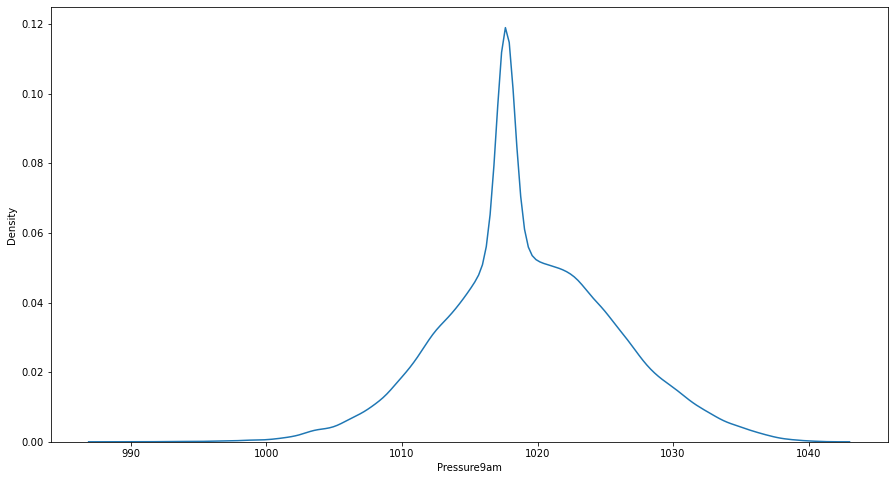

In [285]:
sns.kdeplot(pressure9am_non_rainy_day)
plt.show()

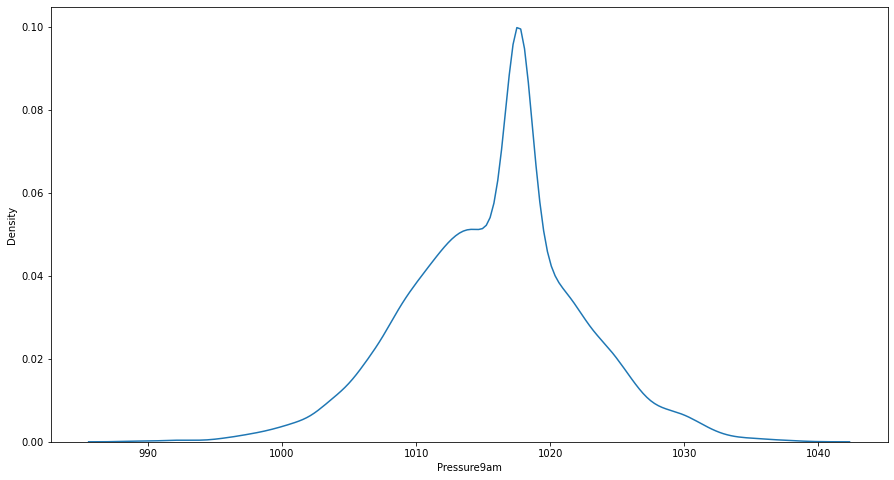

In [286]:
sns.kdeplot(pressure9am_rainy_day)
plt.show()

**Pressure3pm:**

In [287]:
print('H0:The average pressure at 3pm on rainy day as well as non-rainy day is the same')
print('H1:The average pressure at 3pm rainy day as well as non-rainy day is not the same')
pressure3pm_rainy_day=df[df['RainTomorrow']=='Yes']['Pressure3pm']
pressure3pm_non_rainy_day=df[df['RainTomorrow']=='No']['Pressure3pm']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(pressure3pm_rainy_day))
print(shapiro(pressure3pm_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(pressure3pm_rainy_day,pressure3pm_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(pressure3pm_rainy_day,pressure3pm_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average pressure at 3pm on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average pressure at 3pm on rainy day as well as non-rainy day is not the same')

H0:The average pressure at 3pm on rainy day as well as non-rainy day is the same
H1:The average pressure at 3pm rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9922467470169067, pvalue=7.829446949508871e-25)
ShapiroResult(statistic=0.9934567213058472, pvalue=2.802596928649634e-45)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=49.28006581809912, pvalue=2.2361724924573265e-12)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The average pressure at 3pm on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Pressure3pm` is statistically significant in predicting the target variable.

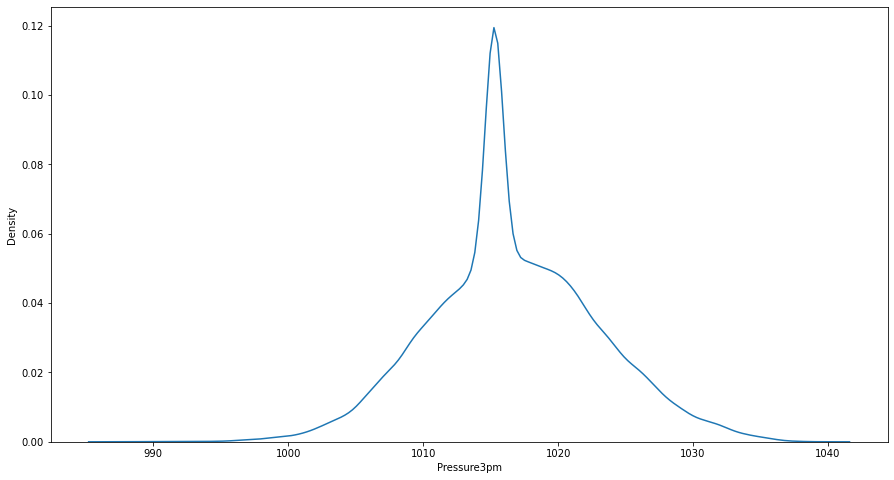

In [288]:
sns.kdeplot(pressure3pm_non_rainy_day)
plt.show()

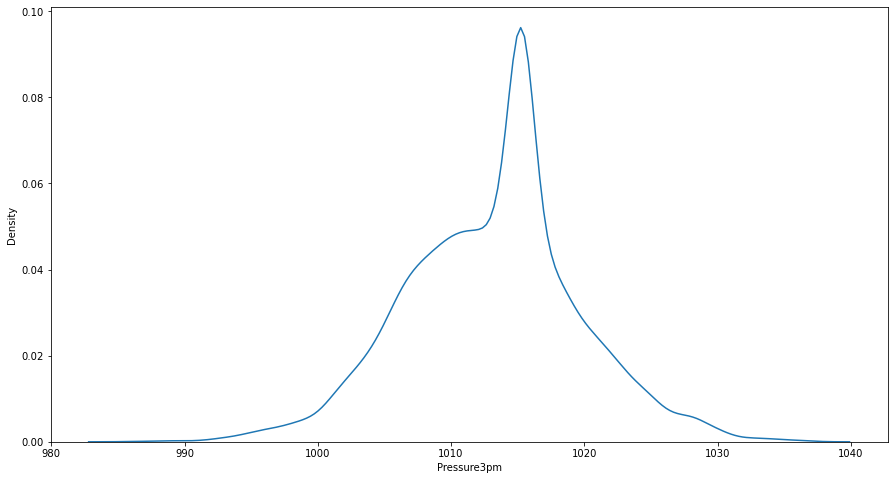

In [289]:
sns.kdeplot(pressure3pm_rainy_day)
plt.show()

**Cloud9am:**

In [290]:
print('H0:The cloud condition at 9am on rainy day as well as non-rainy day is the same')
print('H1:The cloud condition at 9am rainy day as well as non-rainy day is not the same')
cloud9am_rainy_day=df[df['RainTomorrow']=='Yes']['Cloud9am']
cloud9am_non_rainy_day=df[df['RainTomorrow']=='No']['Cloud9am']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(cloud9am_rainy_day))
print(shapiro(cloud9am_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(cloud9am_rainy_day,cloud9am_non_rainy_day))
print('Although pvalue < alpha,we assume that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(cloud9am_rainy_day,cloud9am_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The cloud condition at 9am on rainy day as well as non-rainy day is the same')
else:
    print('H1:The cloud condition at 9am on rainy day as well as non-rainy day is not the same')

H0:The cloud condition at 9am on rainy day as well as non-rainy day is the same
H1:The cloud condition at 9am rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.8823051452636719, pvalue=0.0)
ShapiroResult(statistic=0.8872565627098083, pvalue=0.0)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=81.18075551661354, pvalue=2.1025988078236128e-19)
Although pvalue < alpha,we assume that the populations have equal variance.
Conclusion of the test is:
H1:The cloud condition at 9am on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Cloud9am` is statistically significant in predicting the target variable.

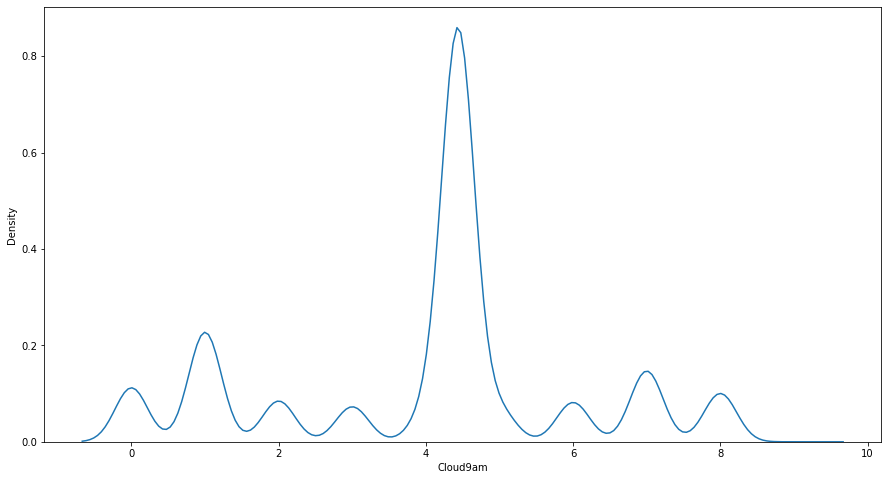

In [291]:
sns.kdeplot(cloud9am_non_rainy_day)
plt.show()

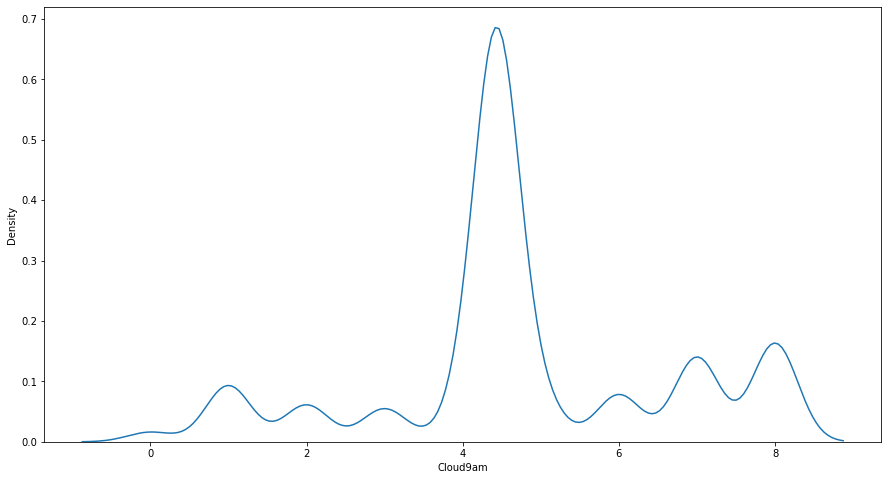

In [292]:
sns.kdeplot(cloud9am_rainy_day)
plt.show()

**Cloud3pm:**

In [293]:
print('H0:The cloud condition at 3pm on rainy day as well as non-rainy day is the same')
print('H1:The cloud condition at 3pm rainy day as well as non-rainy day is not the same')
cloud3pm_rainy_day=df[df['RainTomorrow']=='Yes']['Cloud3pm']
cloud3pm_non_rainy_day=df[df['RainTomorrow']=='No']['Cloud3pm']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(cloud3pm_rainy_day))
print(shapiro(cloud3pm_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(cloud3pm_rainy_day,cloud3pm_non_rainy_day))
print('Since pvalue > alpha,it can be inferred that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(cloud3pm_rainy_day,cloud3pm_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The cloud condition at 3pm on rainy day as well as non-rainy day is the same')
else:
    print('H1:The cloud condition at 3pm on rainy day as well as non-rainy day is not the same')

H0:The cloud condition at 3pm on rainy day as well as non-rainy day is the same
H1:The cloud condition at 3pm rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.8760185241699219, pvalue=0.0)
ShapiroResult(statistic=0.8813042640686035, pvalue=0.0)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=0.7037154477060378, pvalue=0.4015404991561642)
Since pvalue > alpha,it can be inferred that the populations have equal variance.
Conclusion of the test is:
H1:The cloud condition at 3pm on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Cloud3pm` is statistically significant in predicting the target variable.

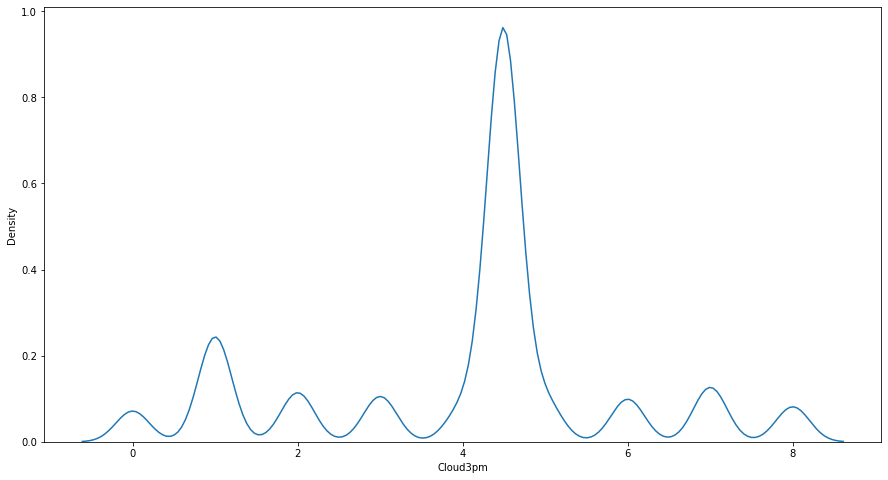

In [294]:
sns.kdeplot(cloud3pm_non_rainy_day)
plt.show()

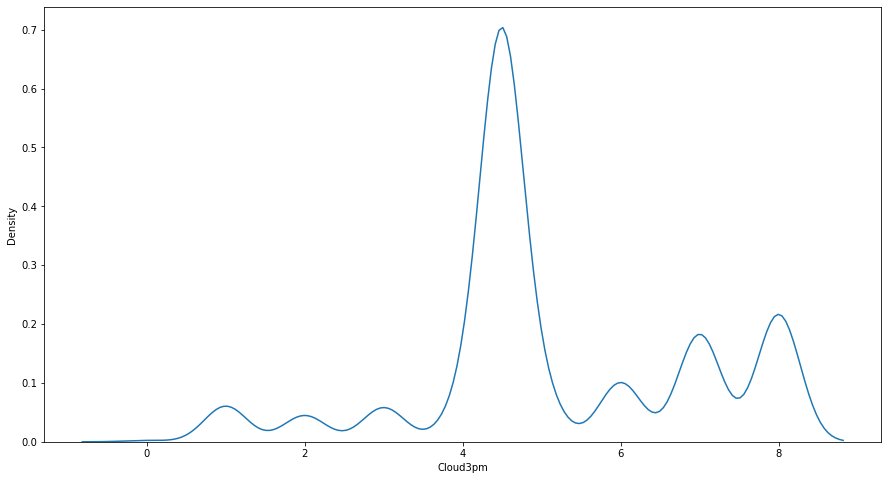

In [295]:
sns.kdeplot(cloud3pm_rainy_day)
plt.show()

**Temp9am:**

In [296]:
print('H0:The average temperature at 9am on rainy day as well as non-rainy day is the same')
print('H1:The average temperature at 9am rainy day as well as non-rainy day is not the same')
temp9am_rainy_day=df[df['RainTomorrow']=='Yes']['Temp9am']
temp9am_non_rainy_day=df[df['RainTomorrow']=='No']['Temp9am']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(temp9am_rainy_day))
print(shapiro(temp9am_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(temp9am_rainy_day,temp9am_non_rainy_day))
print('Although pvalue < alpha,it can be assumed that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(temp9am_rainy_day,temp9am_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average temperature at 9am on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average temperature at 9am on rainy day as well as non-rainy day is not the same')

H0:The average temperature at 9am on rainy day as well as non-rainy day is the same
H1:The average temperature at 9am rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9955379962921143, pvalue=1.196331881191049e-18)
ShapiroResult(statistic=0.9981899261474609, pvalue=4.63587084017233e-26)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=14.463714359999795, pvalue=0.0001429889126069018)
Although pvalue < alpha,it can be assumed that the populations have equal variance.
Conclusion of the test is:
H1:The average temperature at 9am on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Temp9am` is statistically significant in predicting the target variable.

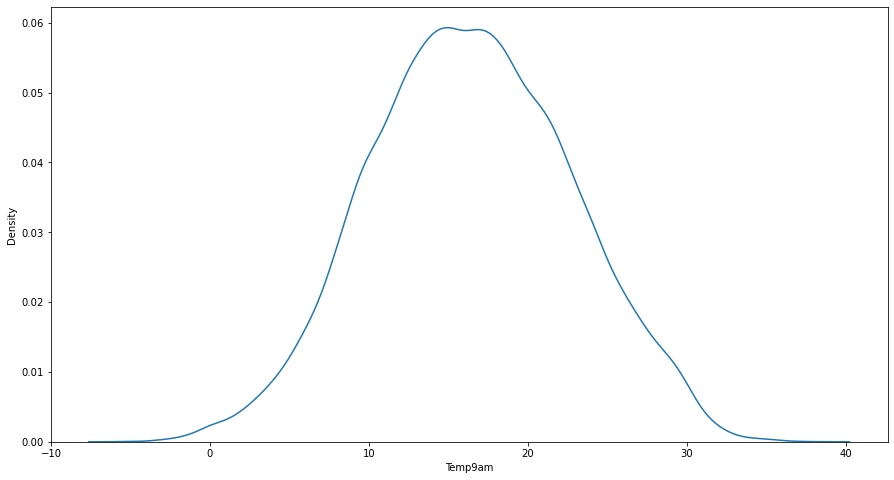

In [297]:
sns.kdeplot(temp9am_non_rainy_day)
plt.show()

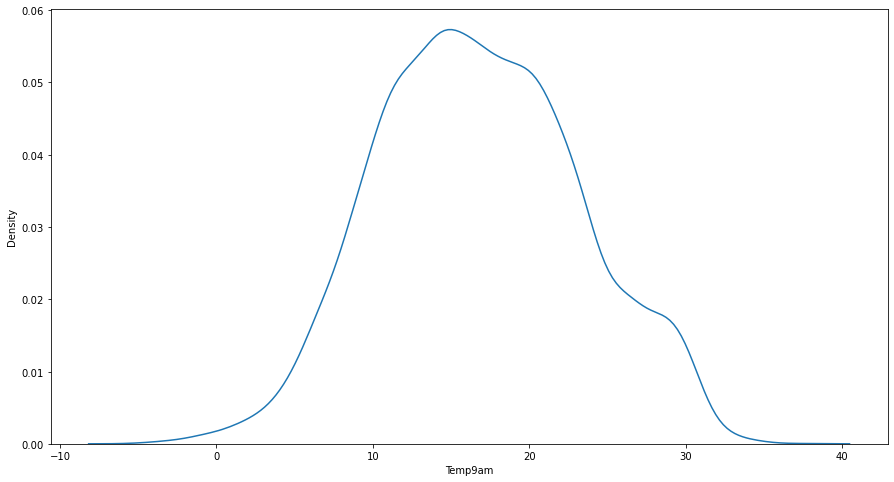

In [298]:
sns.kdeplot(temp9am_rainy_day)
plt.show()

**Temp3pm:**

In [299]:
print('H0:The average temperature at 3pm on rainy day as well as non-rainy day is the same')
print('H1:The average temperature at 3pm rainy day as well as non-rainy day is not the same')
temp3pm_rainy_day=df[df['RainTomorrow']=='Yes']['Temp3pm']
temp3pm_non_rainy_day=df[df['RainTomorrow']=='No']['Temp3pm']
t=len(df['RainTomorrow'].unique())
N=df['RainTomorrow'].value_counts().sum()
print('Alpha is',alpha)
#Shapiro-Wilk Test: H0:Sample data is normally distributed H1:Sample data is not normally disributed
print(shapiro(temp3pm_rainy_day))
print(shapiro(temp3pm_non_rainy_day))
print('Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.')
#Levene's Test: H0:Populations have equal variance H1:Populations have unequal variance
print(levene(temp3pm_rainy_day,temp3pm_non_rainy_day))
print('Although pvalue < alpha,it can be assumed that the populations have equal variance.')
f_critical=stats.f.ppf(1-alpha,dfn=t-1,dfd=N-t)
f_test_statistic,p=f_oneway(temp3pm_rainy_day,temp3pm_non_rainy_day)
print('Conclusion of the test is:')
if f_test_statistic<f_critical:
    print('H0:The average temperature at 3pm on rainy day as well as non-rainy day is the same')
else:
    print('H1:The average temperature at 3pm on rainy day as well as non-rainy day is not the same')

H0:The average temperature at 3pm on rainy day as well as non-rainy day is the same
H1:The average temperature at 3pm rainy day as well as non-rainy day is not the same
Alpha is 0.05
ShapiroResult(statistic=0.9924028515815735, pvalue=1.3746110321616014e-24)
ShapiroResult(statistic=0.9951705932617188, pvalue=2.944982865609679e-40)
Although pvalue < alpha,samples can be considered to be normally distributed as evident from the below distribution plots.
LeveneResult(statistic=43.81274018248783, pvalue=3.63556549851792e-11)
Although pvalue < alpha,it can be assumed that the populations have equal variance.
Conclusion of the test is:
H1:The average temperature at 3pm on rainy day as well as non-rainy day is not the same


From the above statistical test,it can be inferred that the numerical feature - `Temp3pm` is statistically significant in predicting the target variable.

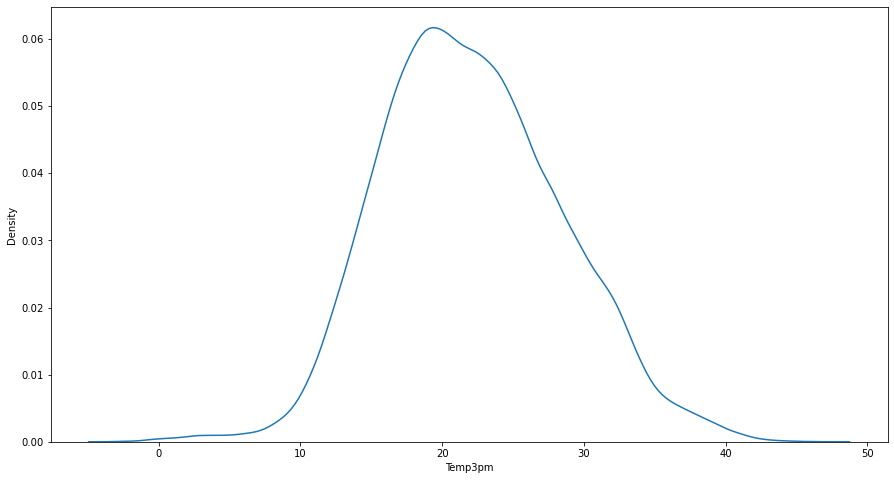

In [300]:
sns.kdeplot(temp3pm_non_rainy_day)
plt.show()

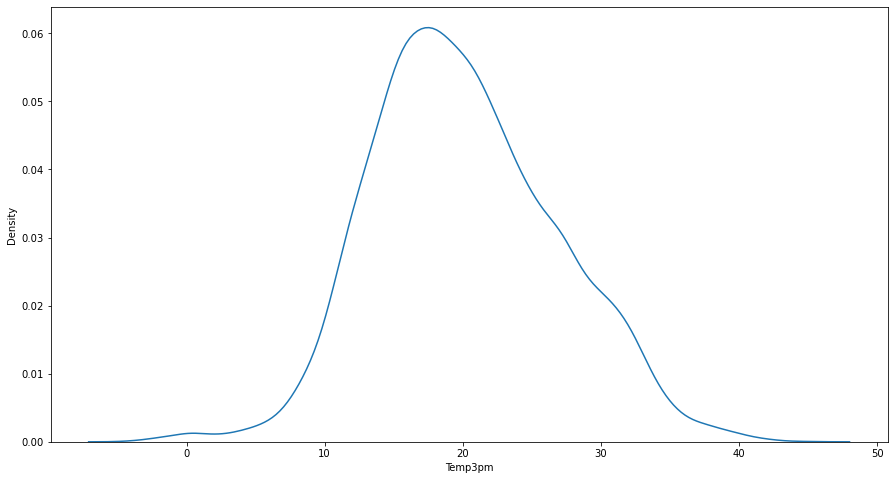

In [301]:
sns.kdeplot(temp3pm_rainy_day)
plt.show()

**Categorical Features:**

**Location:**

In [302]:
print('H0: Occurrence of rainfall does not depend on the location')
print('H1: Occurrence of rainfall depends on the location')
c=1-alpha
o=pd.crosstab(df['Location'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on the location')
else:
    print('Occurrence of rainfall depends on the location')

H0: Occurrence of rainfall does not depend on the location
H1: Occurrence of rainfall depends on the location
Conclusion of the test is:
Occurrence of rainfall depends on the location


From the above statistical test,it can be inferred that the categorical feature - `Location` is statistically significant in predicting the target variable.

**WindGustDir:**

In [330]:
print('H0: Occurrence of rainfall does not depend on the wind gust direction.')
print('H1: Occurrence of rainfall depends on the wind gust direction.')
c=1-alpha
o=pd.crosstab(df['WindGustDir'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on the wind gust direction.')
else:
    print('Occurrence of rainfall depends on the wind gust direction.')

H0: Occurrence of rainfall does not depend on the wind gust direction.
H1: Occurrence of rainfall depends on the wind gust direction.
Conclusion of the test is:
Occurrence of rainfall depends on the wind gust direction.


From the above statistical test,it can be inferred that the categorical feature - `WindGustDir` is statistically significant in predicting the target variable.

**WindDir9am:**

In [55]:
print('H0: Occurrence of rainfall does not depend on the wind direction at 9am.')
print('H1: Occurrence of rainfall depends on the wind direction at 9am.')
c=1-alpha
o=pd.crosstab(df['WindDir9am'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on the wind direction at 9am.')
else:
    print('Occurrence of rainfall depends on the wind direction at 9am.')

H0: Occurrence of rainfall does not depend on the wind direction at 9am.
H1: Occurrence of rainfall depends on the wind direction at 9am.
Conclusion of the test is:
Occurrence of rainfall depends on the wind direction at 9am.


From the above statistical test,it can be inferred that the categorical feature - `WindDir9am` is statistically significant in predicting the target variable.

**WindDir3pm:**

In [83]:
print('H0: Occurrence of rainfall does not depend on the wind direction at 3pm.')
print('H1: Occurrence of rainfall depends on the wind direction at 3pm.')
c=1-alpha
o=pd.crosstab(df['WindDir3pm'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on the wind direction at 3pm.')
else:
    print('Occurrence of rainfall depends on the wind direction at 3pm.')

H0: Occurrence of rainfall does not depend on the wind direction at 3pm.
H1: Occurrence of rainfall depends on the wind direction at 3pm.
Conclusion of the test is:
Occurrence of rainfall depends on the wind direction at 3pm.


From the above statistical test,it can be inferred that the categorical feature - `WindDir3pm` is statistically significant in predicting the target variable.

**RainToday:**

In [111]:
print('H0: Occurrence of rainfall does not depend on whether it rained on the previous day.')
print('H1: Occurrence of rainfall depends on whether it rained on the previous day.')
c=1-alpha
o=pd.crosstab(df['RainToday'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on whether it rained on the previous day.')
else:
    print('Occurrence of rainfall depends on whether it rained on the previous day.')

H0: Occurrence of rainfall does not depend on whether it rained on the previous day.
H1: Occurrence of rainfall depends on whether it rained on the previous day.
Conclusion of the test is:
Occurrence of rainfall depends on whether it rained on the previous day.


From the above statistical test,it can be inferred that the categorical feature - `RainToday` is statistically significant in predicting the target variable.

**Season:**

In [110]:
print('H0: Occurrence of rainfall does not depend on the season.')
print('H1: Occurrence of rainfall depends on the season.')
c=1-alpha
o=pd.crosstab(df['Season'],df['RainTomorrow']).values
n=len(o[0])
chi2_critical=stats.chi2.ppf(1-alpha,df=n-1)
chi2_test_statistic,p,df,e=chi2_contingency(observed=o,correction=False)
print('Conclusion of the test is:')
if chi2_test_statistic<chi2_critical:
    print('Occurrence of rainfall does not depend on the season.')
else:
    print('Occurrence of rainfall depends on the season.')

H0: Occurrence of rainfall does not depend on the season.
H1: Occurrence of rainfall depends on the season.
Conclusion of the test is:
Occurrence of rainfall depends on the season.


From the above statistical test, it can be inferred that the categorical feature - `Season` is statistically significant in predicting the target variable.

From the above statistical tests, it can be inferred that all the predictors need to be included for the purpose of model building as all of them are statistically significant in predicting the target variable.

**Class Imbalance & Treatment:**

Encoding the Target Variable:

In [413]:
df['RainTomorrow']=df['RainTomorrow'].replace({'Yes':1,'No':0})

In [414]:
df_dtypes=df.dtypes.to_frame()
df_dtypes=df_dtypes.rename(columns={0:'Data Type'})
df_dtypes

,Data Type
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


Creation of the Predictors & the Target Variable:

In [415]:
ss=StandardScaler()
pt=PowerTransformer()

In [416]:
df_numerical=df.select_dtypes(include=np.number).drop(columns=['RainTomorrow'])
df_num=pd.DataFrame(data=pt.fit_transform(df_numerical),columns=df_numerical.columns)
df_numerical=pd.DataFrame(data=ss.fit_transform(df_numerical),columns=df_numerical.columns)
df_categorical=df.select_dtypes(include='object')
df_cat=pd.get_dummies(data=df_categorical,drop_first=True)
x=pd.concat(objs=[df_num,df_cat],axis=1)                                              
y=df['RainTomorrow']

In [417]:
x.shape

(82184, 113)

In [418]:
y.shape

(82184,)

**Creation of Training & Testing Datasets:**

80% of the data has been used for training the machine learning model while 20% of the data has been used for testing as shown below:

In [419]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (65747, 113)
Shape of x_test: (16437, 113)
Shape of y_train: (65747,)
Shape of y_test: (16437,)


In [420]:
df_imbalance=round(df['RainTomorrow'].value_counts(normalize=True)*100,2).to_frame()
df_imbalance=df_imbalance.rename(columns={'RainTomorrow':'Class Size'})
df_imbalance

,Class Size
0,85.54
1,14.46


In [421]:
df_imbalance=round(y_train.value_counts(normalize=True)*100,2).to_frame()
df_imbalance=df_imbalance.rename(columns={'RainTomorrow':'Class Size'})
df_imbalance

,Class Size
0,85.59
1,14.41


From the above 2 outputs, it can be observed that class imbalance exists with respect to the target variable and hence smoting needs to be done for the training dataset as shown below: 

In [422]:
smote=SMOTE(random_state=0,sampling_strategy=0.50)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [423]:
df_imbalance=round(y_train.value_counts(normalize=True)*100,2).to_frame()
df_imbalance=df_imbalance.rename(columns={'RainTomorrow':'Class Size'})
df_imbalance

,Class Size
0,66.67
1,33.33


The target variable in the training dataset can now be considered to be balanced.The final shapes of the train and test datasets are: 

In [424]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (84409, 113)
Shape of x_test: (16437, 113)
Shape of y_train: (84409,)
Shape of y_test: (16437,)


**Feature Engineering:**

-The feature, Date has been converted into Season.

-Scaling has been done on the numerical features such that their mean is 0 & standard deviation is 1 as shown below:

In [425]:
a=round(df_num.mean(),0).to_frame()
a=a.rename(columns={0:'Mean'})
a

,Mean
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,-0.0
Sunshine,0.0
WindGustSpeed,0.0
WindSpeed9am,0.0
WindSpeed3pm,-0.0
Humidity9am,0.0
Humidity3pm,-0.0


In [426]:
a=round(df_num.std(),0).to_frame()
a=a.rename(columns={0:'Standard Deviation'})
a

,Standard Deviation
MinTemp,1.0
MaxTemp,1.0
Rainfall,1.0
Evaporation,1.0
Sunshine,1.0
WindGustSpeed,1.0
WindSpeed9am,1.0
WindSpeed3pm,1.0
Humidity9am,1.0
Humidity3pm,1.0


-As part of the feature selection process, it can be inferred that all the features need to be included for the purpose of model building as all of them are statistically significant in predicting the target variable.

**Model Building:**

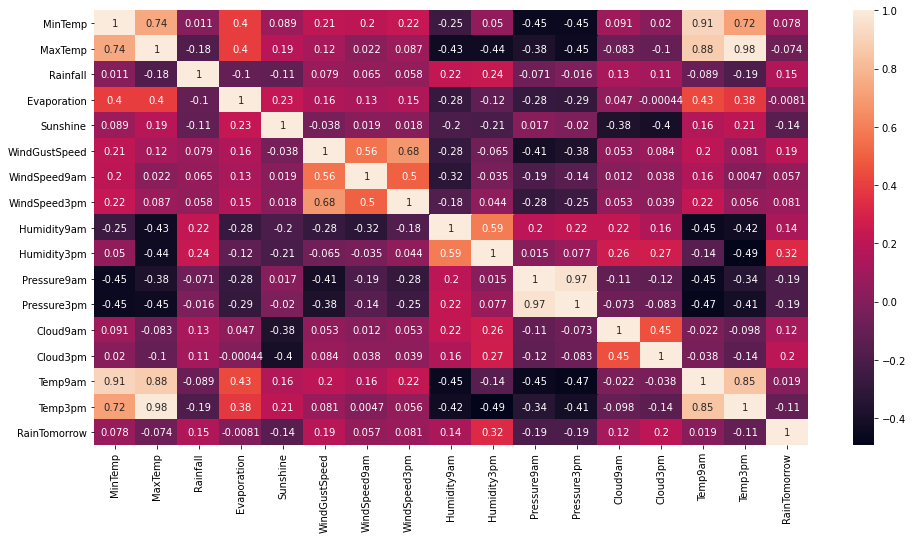

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [47]:
df_skew=round(df.skew(),2).to_frame()
df_skew=df_skew.rename(columns={0:'Skewness'})
df_skew.sort_values(by=['Skewness'],ascending=True)

,Skewness
Humidity9am,-0.32
Cloud3pm,-0.25
Cloud9am,-0.24
Temp9am,0.03
Pressure9am,0.03
Evaporation,0.04
Pressure3pm,0.04
MinTemp,0.08
Humidity3pm,0.15
Temp3pm,0.18


From the above values of skewness, it can be inferred that the distributions of majority of the numerical predictors are near normal.This is also supported by the fact that many pairs of numerical predictors share moderate to strong correlation or linear relatioship patterns among them as evident from the above heatmap.

Models like KNN, decision tree and random forest can be built on data that has non linear relationship patterns in them as such models are capable of handling the non linear patterns in the data.

But as observed above, since there are linear relationship patterns in the dataset, even linear models like logistic regression as well as Naive Bayes can be considered to fit well on the dataset under consideration.

**Logistic Regression:**

As observed earlier from the heatmap as well as Variance Inflation Factor, since there is moderate to strong multicollinearity among the numerical predictors, it can be inferred that an important assumption of the Logistic Regression model has been violated and hence the same cannot be applied on the dataset.

**K Nearest Neighbours:**

In [48]:
knn_model=KNeighborsClassifier()
knn_model=knn_model.fit(x_train,y_train)

**Computation of the Labels:**

In [49]:
y_pred=knn_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [50]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the KNN model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the KNN model is 10.04


**Cohen's Kappa Score:**

In [51]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the KNN model is",round(ck*100,2),'%')

The Cohen's Kappa score of the KNN model is 27.54 %


**Classification Report:**

In [52]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.70      0.81     14030
           1       0.30      0.74      0.43      2407

    accuracy                           0.71     16437
   macro avg       0.62      0.72      0.62     16437
weighted avg       0.85      0.71      0.75     16437



**Confusion Matrix:**

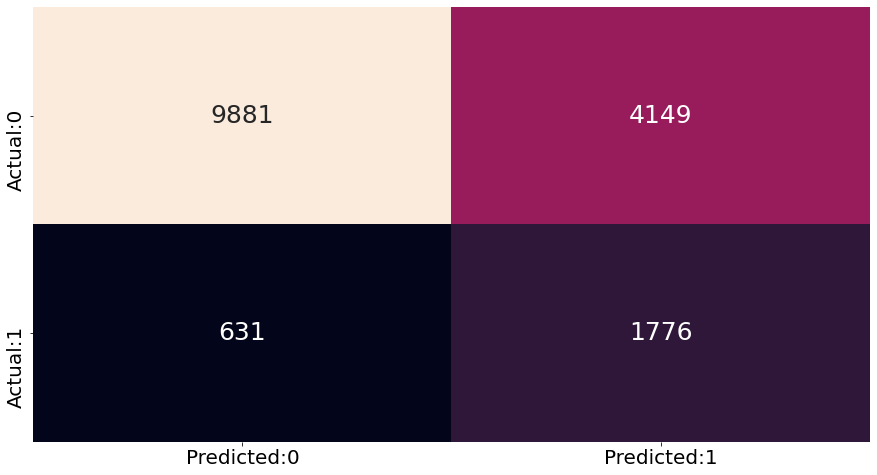

In [53]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [54]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the KNN model is',round(sns,2),'%')
print('Specificity of the KNN model is',round(spc,2),'%')
print('Alpha error of the KNN model is',round(a,2),'%')
print('Beta error of the KNN model is',round(b,2),'%')

Percentage of correctly classified records is 70.92 %
Percentage of wrongly classified records is 29.08 %
Sensitivity of the KNN model is 73.78 %
Specificity of the KNN model is 70.43 %
Alpha error of the KNN model is 29.57 %
Beta error of the KNN model is 26.22 %


**Receiver Operating Characteristic Curve & Score:**

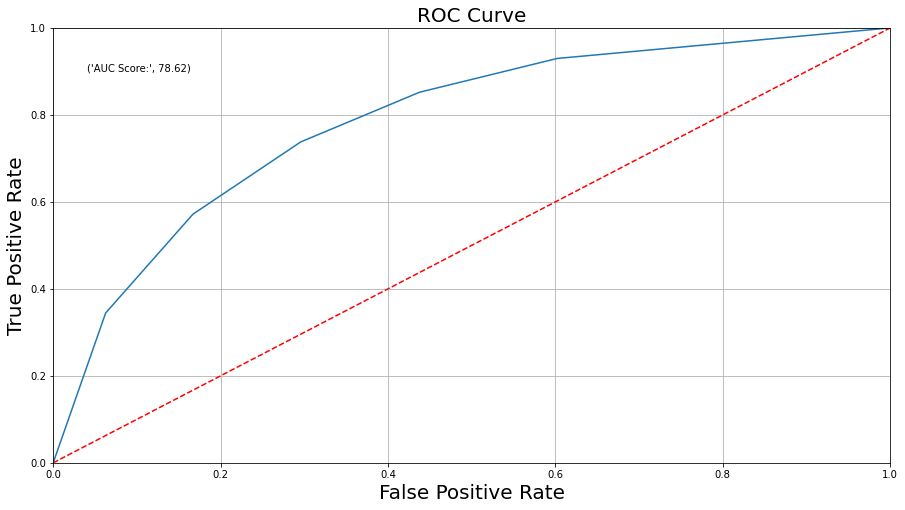

In [55]:
y_pred_prob=knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred_prob)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [56]:
knn=KNeighborsClassifier()
scores=cross_val_score(estimator=knn,X=x_train,y=y_train,scoring='roc_auc',cv=10)
knn_bias_error=1-np.mean(scores)
knn_variance_error=np.std(scores)
print('Bias error of the KNN Model is',round(knn_bias_error*100,2),'%')
print('Variance error of the KNN Model is',round(knn_variance_error*100,2),'%')

Bias error of the KNN Model is 6.81 %
Variance error of the KNN Model is 2.79 %


**Naive Bayes:**

In [102]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

**Computation of the Labels:**

In [103]:
y_pred=nb_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [104]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the Naive Bayes model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the Naive Bayes model is 13.33


**Cohen's Kappa Score:**

In [105]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the Naive Bayes model is",round(ck*100,2),'%')

The Cohen's Kappa score of the Naive Bayes model is 12.45 %


**Classification Report:**

In [106]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.62      0.73     14030
           1       0.21      0.60      0.31      2407

    accuracy                           0.61     16437
   macro avg       0.56      0.61      0.52     16437
weighted avg       0.80      0.61      0.67     16437



**Confusion Matrix:**

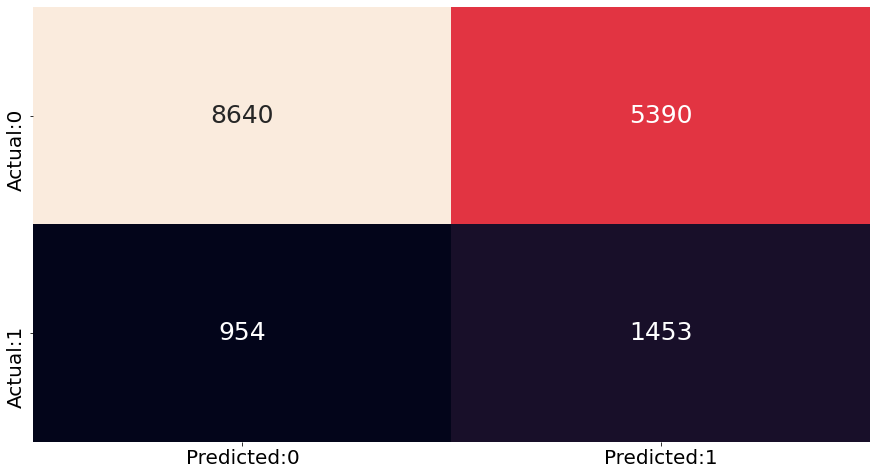

In [107]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [108]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the Naive Bayes model is',round(sns,2),'%')
print('Specificity of the Naive Bayes model is',round(spc,2),'%')
print('Alpha error of the Naive Bayes model is',round(a,2),'%')
print('Beta error of the Naive Bayes model is',round(b,2),'%')

Percentage of correctly classified records is 61.4 %
Percentage of wrongly classified records is 38.6 %
Sensitivity of the Naive Bayes model is 60.37 %
Specificity of the Naive Bayes model is 61.58 %
Alpha error of the Naive Bayes model is 38.42 %
Beta error of the Naive Bayes model is 39.63 %


**Receiver Operating Characteristic Curve & Score:**

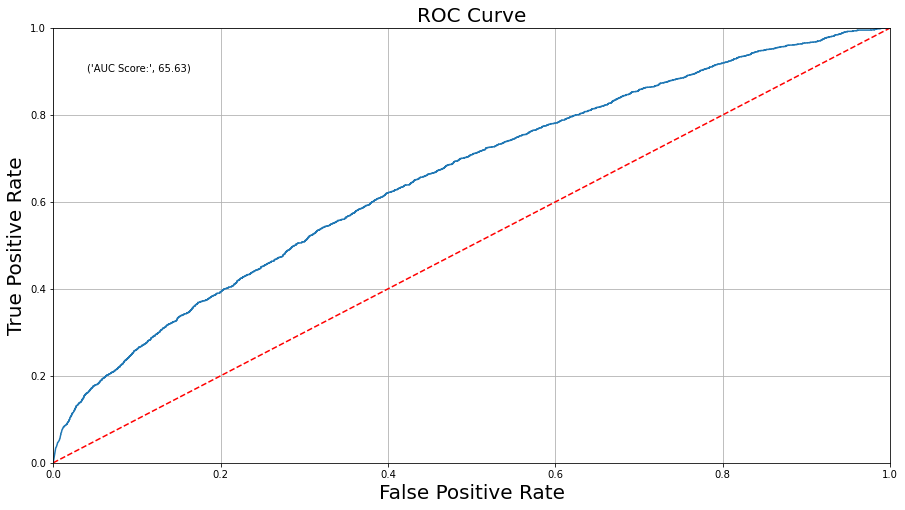

In [109]:
y_pred_prob=nb_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred_prob)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [110]:
nb=GaussianNB()
scores=cross_val_score(estimator=nb,X=x_train,y=y_train,scoring='roc_auc',cv=10)
nb_bias_error=1-np.mean(scores)
nb_variance_error=np.std(scores)
print('Bias error of the Naive Bayes Model is',round(nb_bias_error*100,2),'%')
print('Variance error of the Naive Bayes Model is',round(nb_variance_error*100,2),'%')

Bias error of the Naive Bayes Model is 20.09 %
Variance error of the Naive Bayes Model is 10.3 %


**Decision Tree:**

In [156]:
dt_model=DecisionTreeClassifier(random_state=0)
dt_model=dt_model.fit(x_train,y_train)

**Computation of the Labels:**

In [157]:
y_pred=dt_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [158]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the Decision Tree model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the Decision Tree model is 6.96


**Cohen's Kappa Score:**

In [159]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the Decision Tree model is",round(ck*100,2),'%')

The Cohen's Kappa score of the Decision Tree model is 26.85 %


**Classification Report:**

In [160]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     14030
           1       0.35      0.43      0.39      2407

    accuracy                           0.80     16437
   macro avg       0.62      0.65      0.63     16437
weighted avg       0.82      0.80      0.81     16437



**Confusion Matrix:**

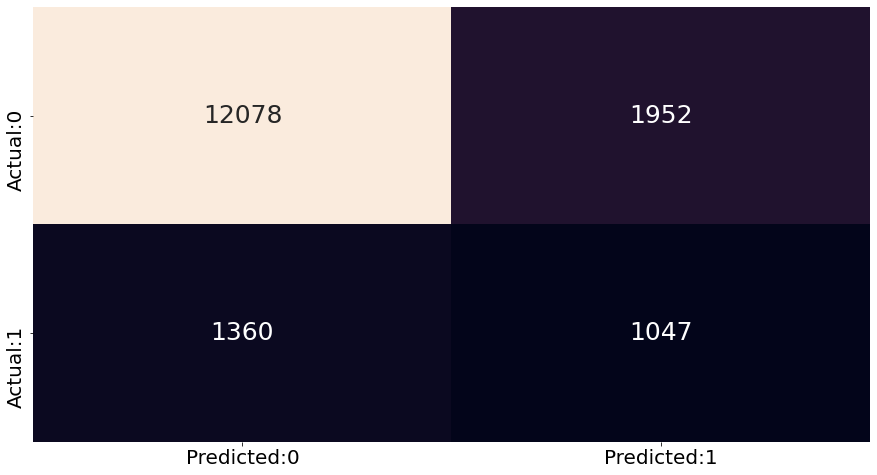

In [161]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [162]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the Decision Tree model is',round(sns,2),'%')
print('Specificity of the Decision Tree model is',round(spc,2),'%')
print('Alpha error of the Decision Tree model is',round(a,2),'%')
print('Beta error of the Decision Tree model is',round(b,2),'%')

Percentage of correctly classified records is 79.85 %
Percentage of wrongly classified records is 20.15 %
Sensitivity of the Decision Tree model is 43.5 %
Specificity of the Decision Tree model is 86.09 %
Alpha error of the Decision Tree model is 13.91 %
Beta error of the Decision Tree model is 56.5 %


**Receiver Operating Characteristic Curve & Score:**

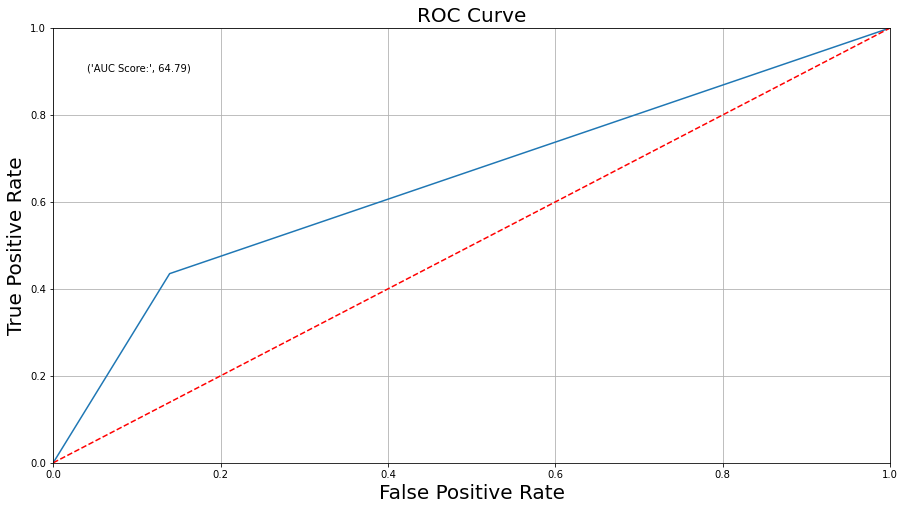

In [163]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [164]:
dt=DecisionTreeClassifier(random_state=0)
scores=cross_val_score(estimator=dt,X=x_train,y=y_train,scoring='roc_auc',cv=10)
dt_bias_error=1-np.mean(scores)
dt_variance_error=np.std(scores)
print('Bias error of the Decision Tree Model is',round(dt_bias_error*100,2),'%')
print('Variance error of the Decision Tree Model is',round(dt_variance_error*100,2),'%')

Bias error of the Decision Tree Model is 19.49 %
Variance error of the Decision Tree Model is 6.96 %


**Random Forest:**

In [210]:
rf_model=RandomForestClassifier(random_state=0)
rf_model=rf_model.fit(x_train,y_train)

**Computation of the Labels:**

In [211]:
y_pred=rf_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [212]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the Random Forest model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the Random Forest model is 4.23


**Cohen's Kappa Score:**

In [213]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the Random Forest model is",round(ck*100,2),'%')

The Cohen's Kappa score of the Random Forest model is 42.48 %


**Classification Report:**

In [214]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14030
           1       0.63      0.40      0.49      2407

    accuracy                           0.88     16437
   macro avg       0.77      0.68      0.71     16437
weighted avg       0.86      0.88      0.87     16437



**Confusion Matrix:**

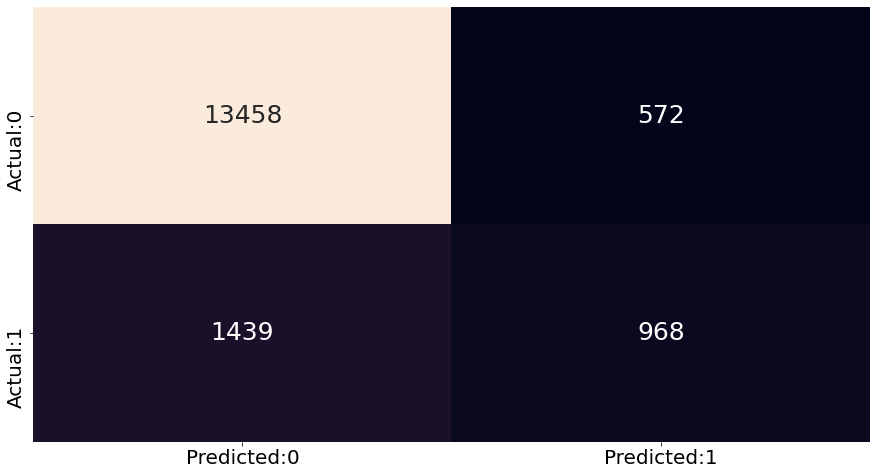

In [215]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [216]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the Random Forest model is',round(sns,2),'%')
print('Specificity of the Random Forest model is',round(spc,2),'%')
print('Alpha error of the Random Forest model is',round(a,2),'%')
print('Beta error of the Random Forest model is',round(b,2),'%')

Percentage of correctly classified records is 87.77 %
Percentage of wrongly classified records is 12.23 %
Sensitivity of the Random Forest model is 40.22 %
Specificity of the Random Forest model is 95.92 %
Alpha error of the Random Forest model is 4.08 %
Beta error of the Random Forest model is 59.78 %


**Receiver Operating Characteristic Curve & Score:**

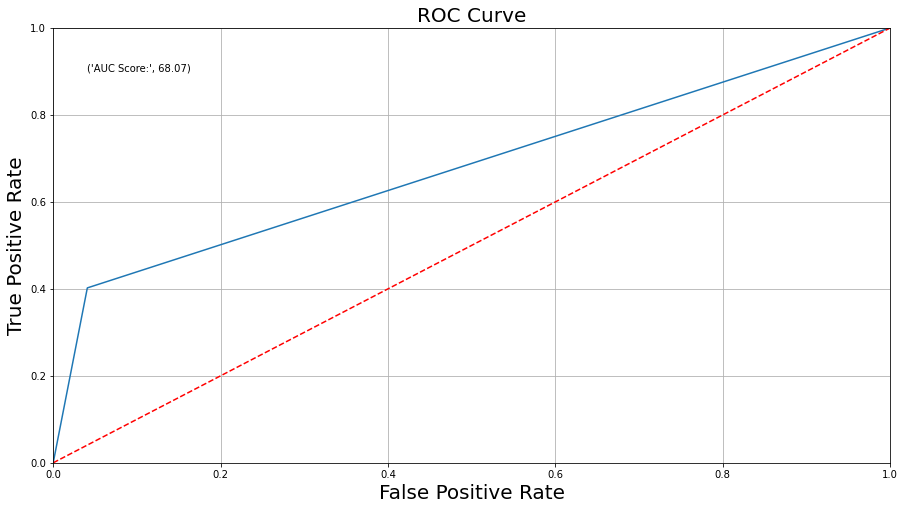

In [217]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [218]:
rf=RandomForestClassifier(random_state=0)
scores=cross_val_score(estimator=rf,X=x_train,y=y_train,scoring='roc_auc',cv=10)
rf_bias_error=1-np.mean(scores)
rf_variance_error=np.std(scores)
print('Bias error of the Random Forest Model is',round(rf_bias_error*100,2),'%')
print('Variance error of the Random Forest Model is',round(rf_variance_error*100,2),'%')

Bias error of the Random Forest Model is 3.38 %
Variance error of the Random Forest Model is 2.54 %


**AdaBoost Model:**

In [264]:
ada_model=AdaBoostClassifier(random_state=0)
ada_model=ada_model.fit(x_train,y_train)

**Computation of the Labels:**

In [265]:
y_pred=ada_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [266]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the AdaBoost model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the AdaBoost model is 5.33


**Cohen's Kappa Score:**

In [267]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the AdaBoost model is",round(ck*100,2),'%')

The Cohen's Kappa score of the AdaBoost model is 38.27 %


**Classification Report:**

In [268]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14030
           1       0.47      0.47      0.47      2407

    accuracy                           0.85     16437
   macro avg       0.69      0.69      0.69     16437
weighted avg       0.85      0.85      0.85     16437



**Confusion Matrix:**

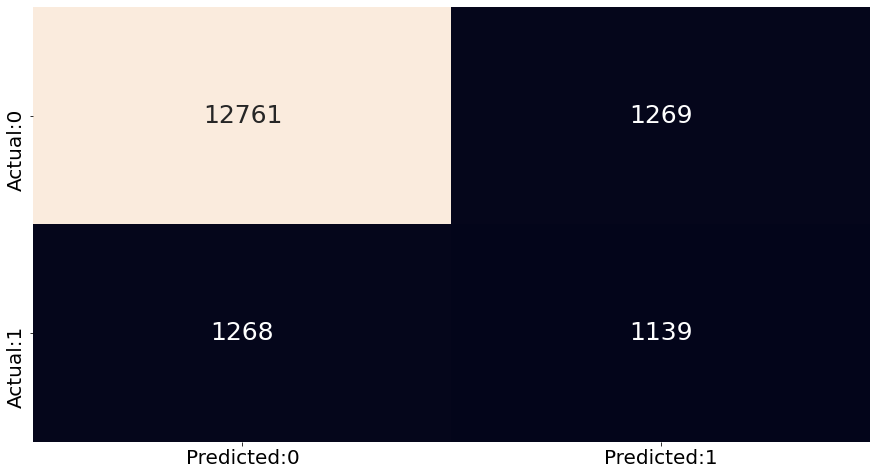

In [269]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [270]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the AdaBoost model is',round(sns,2),'%')
print('Specificity of the AdaBoost model is',round(spc,2),'%')
print('Alpha error of the AdaBoost model is',round(a,2),'%')
print('Beta error of the AdaBoost model is',round(b,2),'%')

Percentage of correctly classified records is 84.57 %
Percentage of wrongly classified records is 15.43 %
Sensitivity of the AdaBoost model is 47.32 %
Specificity of the AdaBoost model is 90.96 %
Alpha error of the AdaBoost model is 9.04 %
Beta error of the AdaBoost model is 52.68 %


**Receiver Operating Characteristic Curve & Score:**

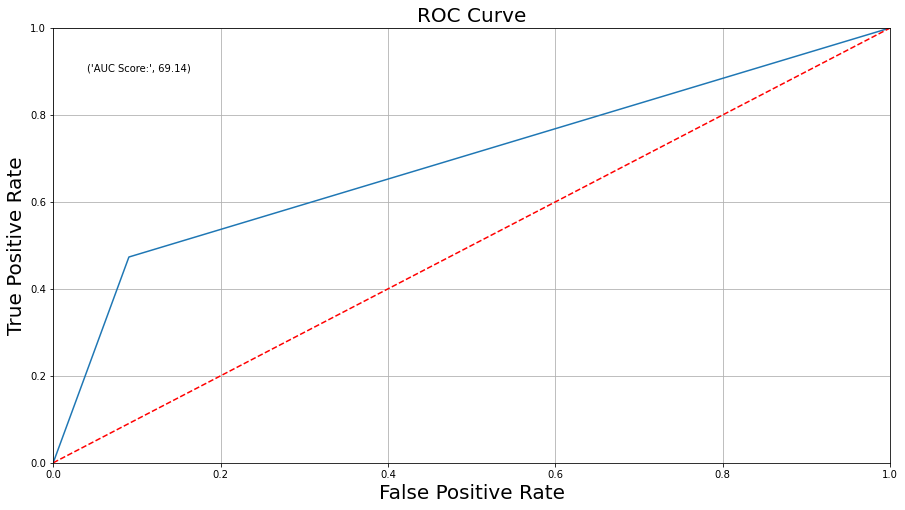

In [271]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [272]:
ada=AdaBoostClassifier(random_state=0)
scores=cross_val_score(estimator=ada,X=x_train,y=y_train,scoring='roc_auc',cv=10)
ada_bias_error=1-np.mean(scores)
ada_variance_error=np.std(scores)
print('Bias error of the Adaboost Model is',round(ada_bias_error*100,2),'%')
print('Variance error of the Adaboost Model is',round(ada_variance_error*100,2),'%')

Bias error of the Adaboost Model is 12.01 %
Variance error of the Adaboost Model is 5.2 %


**Gradient Boosting:**

In [318]:
gb_model=GradientBoostingClassifier(random_state=0)
gb_model=gb_model.fit(x_train,y_train)

**Computation of the Labels:**

In [319]:
y_pred=gb_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [320]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the Gradient Boosting model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the Gradient Boosting model is 4.66


**Cohen's Kappa Score:**

In [321]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the Gradient Boosting model is",round(ck*100,2),'%')

The Cohen's Kappa score of the Gradient Boosting model is 42.22 %


**Classification Report:**

In [322]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14030
           1       0.55      0.46      0.50      2407

    accuracy                           0.87     16437
   macro avg       0.73      0.70      0.71     16437
weighted avg       0.86      0.87      0.86     16437



**Confusion Matrix:**

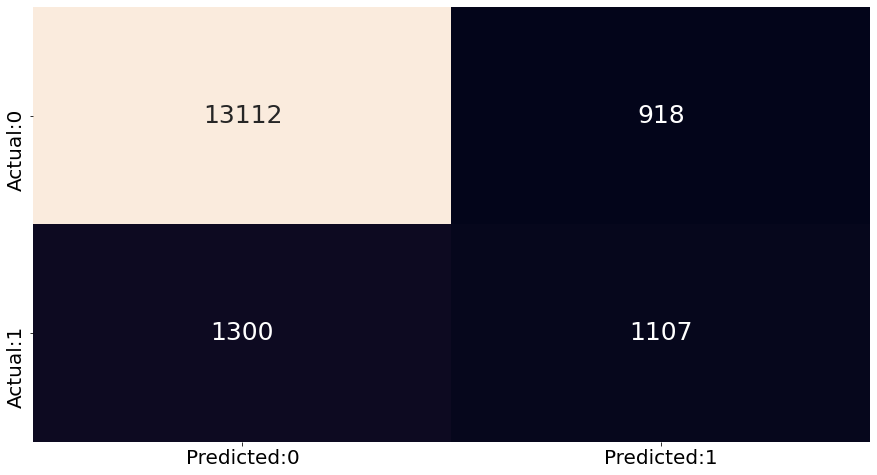

In [323]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [324]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the Gradient Boosting model is',round(sns,2),'%')
print('Specificity of the Gradient Boosting model is',round(spc,2),'%')
print('Alpha error of the Gradient Boosting model is',round(a,2),'%')
print('Beta error of the Gradient Boosting model is',round(b,2),'%')

Percentage of correctly classified records is 86.51 %
Percentage of wrongly classified records is 13.49 %
Sensitivity of the Gradient Boosting model is 45.99 %
Specificity of the Gradient Boosting model is 93.46 %
Alpha error of the Gradient Boosting model is 6.54 %
Beta error of the Gradient Boosting model is 54.01 %


**Receiver Operating Characteristic Curve & Score:**

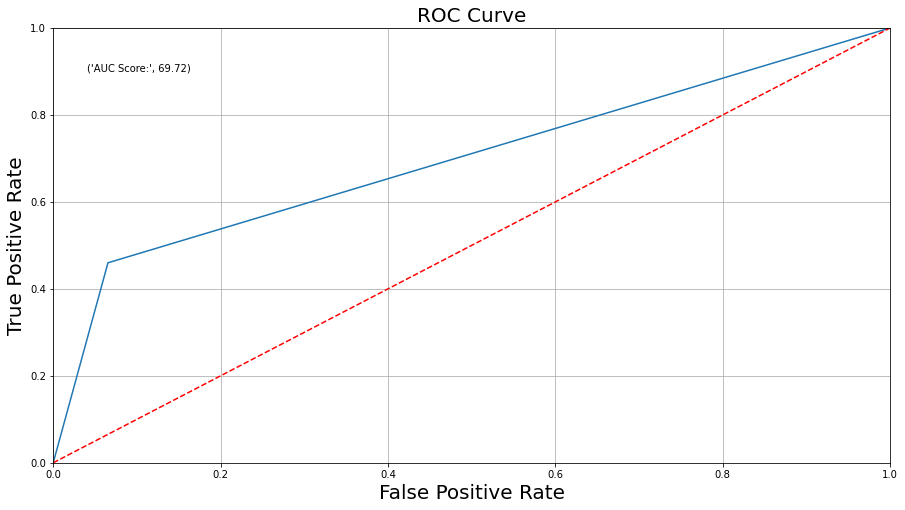

In [325]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [326]:
gb=GradientBoostingClassifier(random_state=0)
scores=cross_val_score(estimator=gb,X=x_train,y=y_train,scoring='roc_auc',cv=10)
gb_bias_error=1-np.mean(scores)
gb_variance_error=np.std(scores)
print('Bias error of the Gradient Boosting Model is',round(gb_bias_error*100,2),'%')
print('Variance error of the Gradient Boosting Model is',round(gb_variance_error*100,2),'%')

Bias error of the Gradient Boosting Model is 9.4 %
Variance error of the Gradient Boosting Model is 4.76 %


**XGBoost:**

In [372]:
xgb_model=XGBClassifier()
xgb_model=xgb_model.fit(x_train,y_train)

[17:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


**Computation of the Labels:**

In [373]:
y_pred=xgb_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [374]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the XGBoost model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the XGBoost model is 4.07


**Cohen's Kappa Score:**

In [375]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the XGBoost model is",round(ck*100,2),'%')

The Cohen's Kappa score of the XGBoost model is 43.8 %


**Classification Report:**

In [376]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14030
           1       0.66      0.40      0.50      2407

    accuracy                           0.88     16437
   macro avg       0.78      0.68      0.72     16437
weighted avg       0.87      0.88      0.87     16437



**Confusion Matrix:**

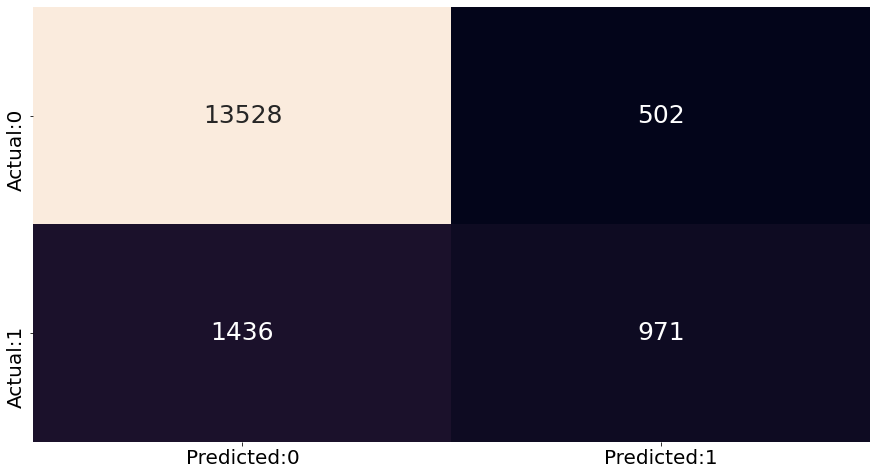

In [377]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [378]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the XGBoost model is',round(sns,2),'%')
print('Specificity of the XGBoost model is',round(spc,2),'%')
print('Alpha error of the XGBoost model is',round(a,2),'%')
print('Beta error of the XGBoost model is',round(b,2),'%')

Percentage of correctly classified records is 88.21 %
Percentage of wrongly classified records is 11.79 %
Sensitivity of the XGBoost model is 40.34 %
Specificity of the XGBoost model is 96.42 %
Alpha error of the XGBoost model is 3.58 %
Beta error of the XGBoost model is 59.66 %


**Receiver Operating Characteristic Curve & Score:**

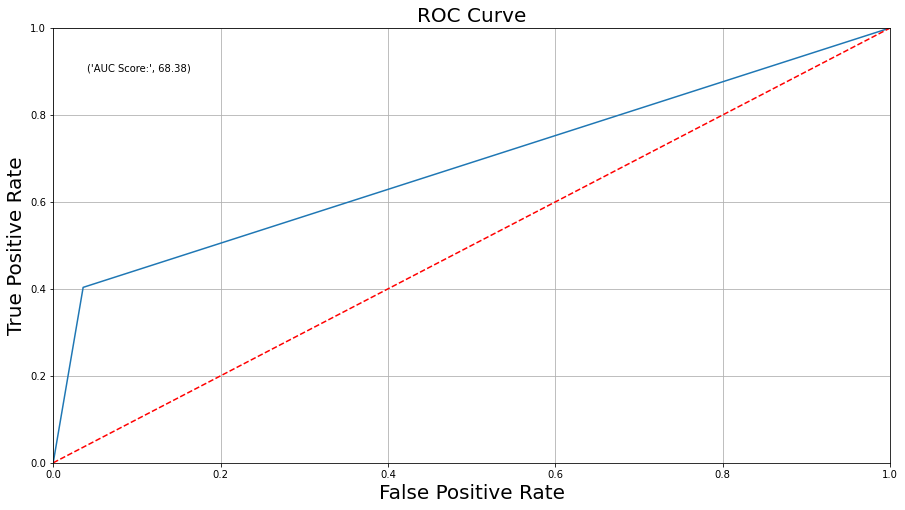

In [379]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [380]:
xgb=XGBClassifier()
scores=cross_val_score(estimator=xgb,X=x_train,y=y_train,scoring='roc_auc',cv=10)
xgb_bias_error=1-np.mean(scores)
xgb_variance_error=np.std(scores)
print('Bias error of the XGBoost Model is',round(xgb_bias_error*100,2),'%')
print('Variance error of the XGBoost Model is',round(xgb_variance_error*100,2),'%')

[17:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

**Model Comparison:**

In [381]:
models=['KNN','Naive Bayes','Decision Tree','Random Forest','Adaboost','Gradient Boosting','XGBoost']
models_bias_error=np.round(np.array([knn_bias_error,nb_bias_error,dt_bias_error,rf_bias_error,ada_bias_error,gb_bias_error,
                                          xgb_bias_error])*100,2)
models_variance_error=np.round(np.array([knn_variance_error,nb_variance_error,dt_variance_error,rf_variance_error,ada_variance_error,
                                             gb_variance_error,xgb_variance_error])*100,2)
df_models=pd.DataFrame({'Model':models,'Bias Error(%)':models_bias_error,'Variance Error(%)':models_variance_error})
df_models.sort_values(by=['Bias Error(%)','Variance Error(%)'],ascending=[True,True])

,Model,Bias Error(%),Variance Error(%)
3,Random Forest,3.38,2.54
6,XGBoost,4.71,5.94
0,KNN,6.81,2.79
5,Gradient Boosting,9.40,4.76
4,Adaboost,12.01,5.20
2,Decision Tree,19.49,6.96
1,Naive Bayes,20.09,10.30


**Final Machine Learning Model - Voting Classifier (Soft Voting):**

The final machine learning model can be built using the voting classifier - soft voting with Random Forest, XGBoost and KNN as the estimators as shown below: 

In [427]:
estimators=[('Random Forest',RandomForestClassifier(random_state=0)),('XGBoost',XGBClassifier()),('KNN',KNeighborsClassifier())]
final_model=VotingClassifier(estimators=estimators,voting='soft')
final_model=final_model.fit(x_train,y_train)

[18:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


**Computation of the Labels:**

In [428]:
y_pred=final_model.predict(x_test)

**Log Loss or Cross Entropy:**

In [429]:
cross_entropy=log_loss(y_test,y_pred)
print('Cross Entropy or Log Loss of the Final model is',round(cross_entropy,2))

Cross Entropy or Log Loss of the Final model is 4.65


**Cohen's Kappa Score:**

In [430]:
ck=cohen_kappa_score(y_test,y_pred)
print("The Cohen's Kappa score of the Final model is",round(ck*100,2),'%')

The Cohen's Kappa score of the Final model is 46.1 %


**Classification Report:**

In [431]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14030
           1       0.54      0.54      0.54      2407

    accuracy                           0.87     16437
   macro avg       0.73      0.73      0.73     16437
weighted avg       0.87      0.87      0.87     16437



**Confusion Matrix:**

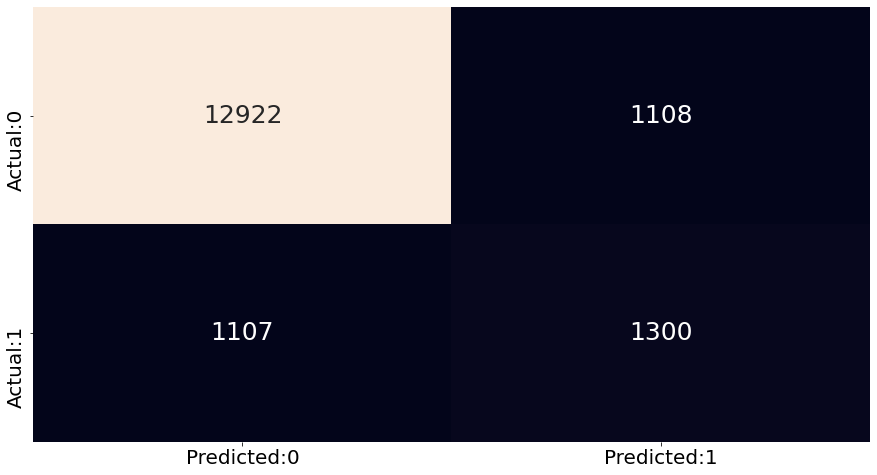

In [432]:
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [433]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the Final model is',round(sns,2),'%')
print('Specificity of the Final model is',round(spc,2),'%')
print('Alpha error of the Final model is',round(a,2),'%')
print('Beta error of the Final model is',round(b,2),'%')

Percentage of correctly classified records is 86.52 %
Percentage of wrongly classified records is 13.48 %
Sensitivity of the Final model is 54.01 %
Specificity of the Final model is 92.1 %
Alpha error of the Final model is 7.9 %
Beta error of the Final model is 45.99 %


**Receiver Operating Characteristic Curve & Score:**

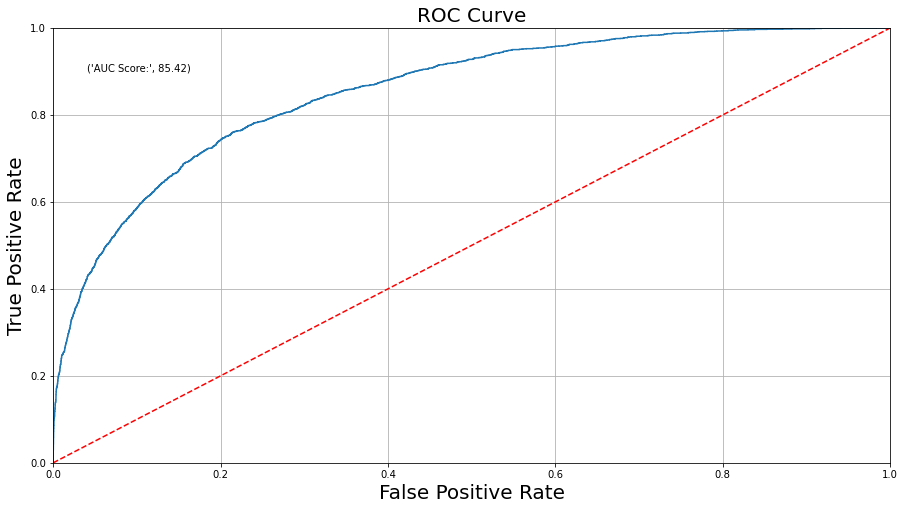

In [434]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred_prob)*100,2)))
plt.grid(True)
plt.show()

**10 Fold Cross Validation:**

In [435]:
estimators=[('Random Forest',RandomForestClassifier(random_state=0)),('XGBoost',XGBClassifier()),('KNN',KNeighborsClassifier())]
final_model=VotingClassifier(estimators=estimators,voting='soft')
scores=cross_val_score(estimator=final_model,X=x_train,y=y_train,scoring='roc_auc',cv=10)
final_model_bias_error=1-np.mean(scores)
final_model_variance_error=np.std(scores)
print('Bias error of the Final Model is',round(final_model_bias_error*100,2),'%')
print('Variance error of the Final Model is',round(final_model_variance_error*100,2),'%')

[18:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

**Final Model v/s Base Models:**

In [436]:
df_models.loc[7]=['Final Model',final_model_bias_error*100,final_model_variance_error*100]
round(df_models.sort_values(by=['Bias Error(%)','Variance Error(%)'],ascending=[True,True]),2)

,Model,Bias Error(%),Variance Error(%)
7,Final Model,2.74,3.11
3,Random Forest,3.38,2.54
6,XGBoost,4.71,5.94
0,KNN,6.81,2.79
5,Gradient Boosting,9.40,4.76
4,Adaboost,12.01,5.20
2,Decision Tree,19.49,6.96
1,Naive Bayes,20.09,10.30


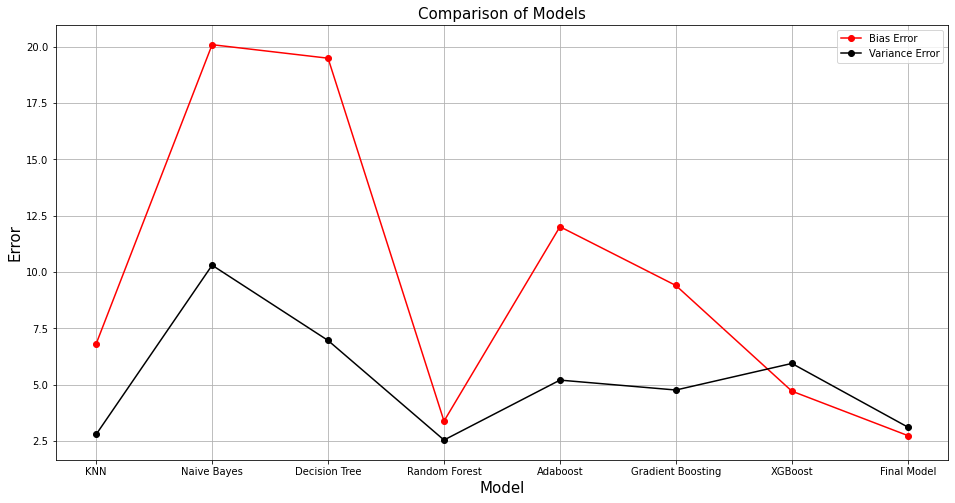

In [437]:
plt.figure(figsize=(16,8))
plt.plot(df_models['Model'],df_models['Bias Error(%)'],marker='o',color='red',label='Bias Error')
plt.plot(df_models['Model'],df_models['Variance Error(%)'],marker='o',color='black',label='Variance Error')
plt.title('Comparison of Models',fontsize=15)
plt.xlabel('Model',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

**Feature Importance Scores:**

In [443]:
df_feature_importances=pd.DataFrame({'Feature':x_train.columns,'Score':np.round(rf_model.feature_importances_,4)})
df_feature_importances.sort_values(by=['Score'],ascending=False).head(10)

,Feature,Score
9,Humidity3pm,0.1395
5,WindGustSpeed,0.0661
11,Pressure3pm,0.0594
10,Pressure9am,0.0519
8,Humidity9am,0.0491
13,Cloud3pm,0.0477
15,Temp3pm,0.0450
0,MinTemp,0.0423
7,WindSpeed3pm,0.0414
14,Temp9am,0.0394


The above 10 features have the most significant role in predicting whether it would rain or not on any given day.